# Exploratory Data Analysis and Line Assumptions

---

## Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.model_selection import train_test_split

# imputation
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def pct_split(num):
    if num == 0:
        return 1
    return ceil(5*num)

def scatter_plot(column):
    plt.figure(figsize = (12, 8))
    plt.title('Relation Between ' + str(column) + ' and Cancer Rates')
    plt.ylabel('Cancer per Million People')
    plt.xlabel(str(column))
    return (plt.scatter(env[column], env['cancer'], alpha = 0.6))

def calc_vif(data):
    v_df = pd.DataFrame(columns = ['vif'],
                       index = data.columns)
    
    v_df['vif'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    
    return v_df.sort_values(by = 'vif', ascending = False)

-------------------------------------

## EDA Visulization

In [3]:
env = pd.read_csv('../data/cleaned_ejscreen.csv', index_col = 'Unnamed: 0')

In [4]:
env.head()

,st_name,st_abbrev,region,pop,poc_pct,low_inc_pct,sub_hs_pct,ling_iso_pct,under_5_pct,over_64_pct,...,resp_index,traffic_prox,npl_prox,rmp_prox,waste_prox,ozone,pm_25,undgrd_stor,shape_length,shape_area
0,Alabama,AL,4,1993,0.167587,0.274962,0.125472,0.000000,0.057702,0.132464,...,0.5,35.919960,0.066752,0.077960,0.500305,37.010497,9.152519,0.412039,19197.315791,1.387495e+07
1,Alabama,AL,4,1959,0.617152,0.435927,0.148254,0.000000,0.050536,0.144972,...,0.5,159.744710,0.072665,0.082735,0.818620,37.038957,9.183280,2.461319,11652.054724,4.694106e+06
2,Alabama,AL,4,3507,0.348446,0.293128,0.149701,0.000000,0.027659,0.160251,...,0.5,169.977159,0.075655,0.082532,1.299859,37.069151,9.207049,1.987063,12474.647834,7.550455e+06
3,Alabama,AL,4,3878,0.103146,0.216864,0.081583,0.023881,0.041774,0.244714,...,0.5,500.544361,0.084317,0.087633,2.056273,37.087437,9.231752,3.362111,14839.595823,9.007288e+06
4,Alabama,AL,4,10596,0.290959,0.203222,0.079653,0.019630,0.047659,0.138071,...,0.5,220.210382,0.093815,0.090465,1.082545,37.123515,9.242796,2.222632,20306.660651,1.613176e+07


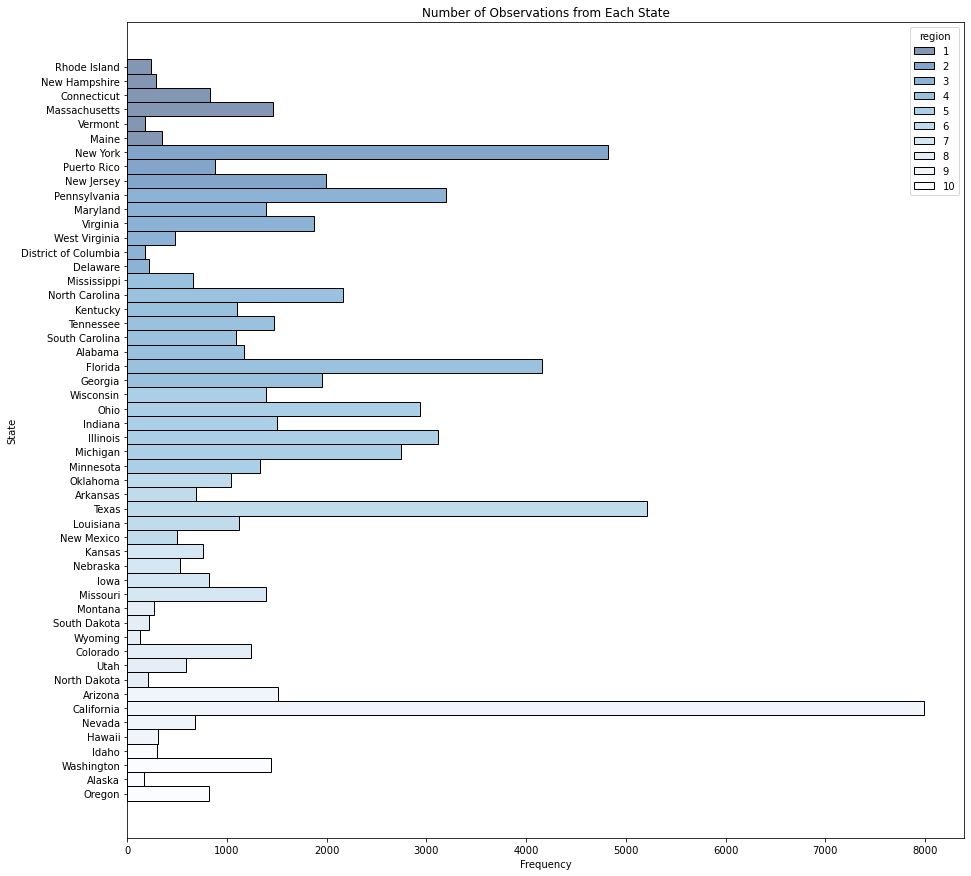

In [5]:
plt.figure(figsize = (15,15))
sns.histplot(data = env.sort_values(by = 'region'), y = 'st_name', hue = 'region', palette = 'Blues_r')
plt.title('Number of Observations from Each State')
plt.ylabel('State')
plt.xlabel('Frequency');



The plot above represents the breakdown of the states by region. The legend shows which color of bar corresponds to each region. The y axis represents the state, and the x axis represents the number of observations in our data set from that state. For example, you can see that California is in Region 9, and has rougly 8000 observations in this dataset.

#### Distribution of Environmental Factors by Region

In [6]:
env.groupby('region')['cancer'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,23.069809,4.889457,10.0,20.0,20.0,30.0,50.0
2,7705.0,28.125892,11.439363,10.0,20.0,30.0,30.0,700.0
3,7331.0,30.847088,10.839519,20.0,30.0,30.0,30.0,200.0
4,13777.0,30.543660,6.772326,10.0,30.0,30.0,30.0,200.0
5,13023.0,24.429855,6.399763,10.0,20.0,20.0,30.0,200.0
6,8566.0,31.872519,17.945773,10.0,30.0,30.0,30.0,1000.0
7,3499.0,25.390111,6.850158,10.0,20.0,30.0,30.0,200.0
8,2653.0,21.882397,11.031822,8.0,20.0,20.0,30.0,200.0
9,10496.0,30.365758,9.673256,9.0,30.0,30.0,40.0,200.0


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


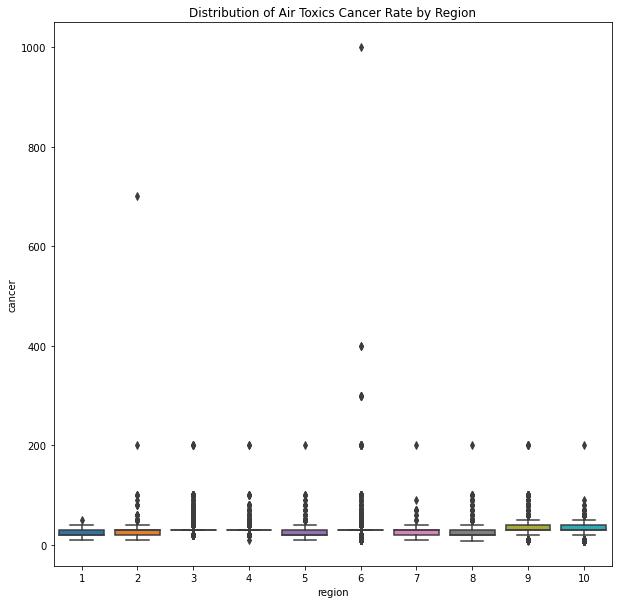

In [7]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Air Toxics Cancer Rate by Region')
sns.boxplot(env['region'], env['cancer']);

The plot above represents the distribution of air toxics cancer rate (per million people) for each region. There are a few large outliers, one in Region 1 at roughly 700 and one in Region 6 at roughly 1000. In every region, the interquartile range is under 100. Regions 3, 4, and 6 have a smaller range in their interquartile region than the other regions. Every region has some outliers, with Region 1 having the fewest. 

In [8]:
env.groupby('region')['diesel_pm'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.225888,0.166455,0.014337,0.116445,0.191467,0.277403,0.964814
2,7705.0,0.546816,0.464245,0.005776,0.171493,0.361109,0.874416,1.927320
3,7331.0,0.271246,0.131901,0.043552,0.161857,0.257618,0.368217,1.025638
4,13777.0,0.258847,0.155412,0.042090,0.132375,0.223881,0.346074,1.155929
5,13023.0,0.287615,0.191082,0.021070,0.157347,0.254129,0.371034,1.818186
6,8566.0,0.227012,0.145676,0.010226,0.115291,0.204643,0.294942,1.026167
7,3499.0,0.219424,0.133728,0.032283,0.109731,0.184288,0.294216,0.782373
8,2653.0,0.202110,0.167286,0.006761,0.056854,0.172190,0.300807,1.531864
9,10496.0,0.335793,0.189558,0.000519,0.186840,0.325031,0.472194,1.150039


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


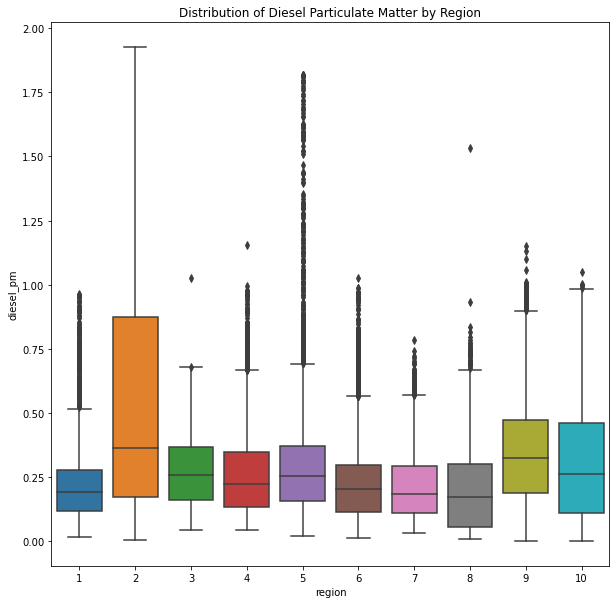

In [9]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Diesel Particulate Matter by Region')
sns.boxplot(env['region'], env['diesel_pm']);

The plot above represents the distribution of diesel particulate matter for each region. There is some variation in the distributions, with Region 2 having a larger interquartile range than any of the other regions. Regions 2 and 9 had the highest medians, around 0.35, and Regions 1, 7, and 8 had the lowest medians, around 0.20. Every region has some outliers except Region 2.

In [10]:
env.groupby('region')['resp_index'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.275865,0.067033,0.10,0.2,0.3,0.3,0.7
2,7705.0,0.368293,0.144860,0.10,0.2,0.3,0.5,0.9
3,7331.0,0.344646,0.076071,0.20,0.3,0.3,0.4,1.0
4,13777.0,0.397394,0.090149,0.10,0.3,0.4,0.4,2.0
5,13023.0,0.301682,0.086828,0.10,0.2,0.3,0.3,2.0
6,8566.0,0.373722,0.099593,0.10,0.3,0.4,0.4,1.0
7,3499.0,0.323092,0.093735,0.10,0.2,0.3,0.4,0.7
8,2653.0,0.294561,0.201211,0.07,0.2,0.3,0.4,2.0
9,10496.0,0.406094,0.193849,0.09,0.3,0.4,0.5,4.0


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


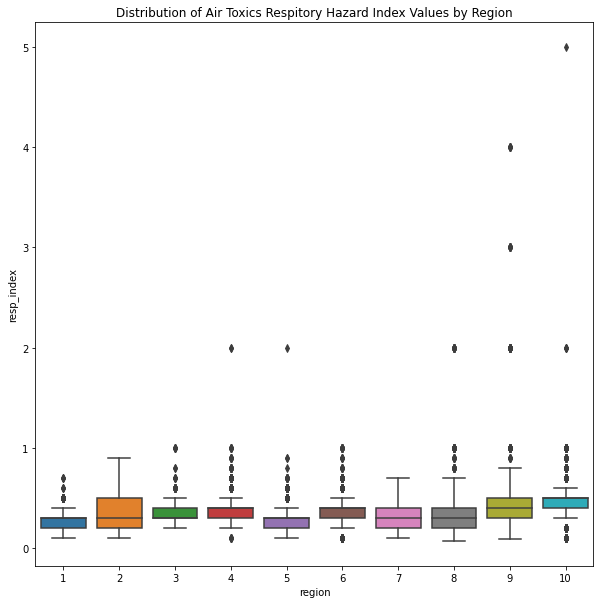

In [11]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Air Toxics Respitory Hazard Index Values by Region')
sns.boxplot(env['region'], env['resp_index']);

The plot above represents the distribution of air toxics respitory hazard index values for each region. The distributions are fairly similar; however, Region 2 has a larger interquartile range than any of the other regions. All of the interquartile ranges are between 0 and 1. All regions have outliers except for Regions 2 and 7, with the highest outlier ranging to roughly 5 in Region 10

In [12]:
env.groupby('region')['npl_prox'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.147918,0.211450,0.009093,0.053249,0.080998,0.141227,2.322005
2,7705.0,0.273155,0.404811,0.011798,0.074253,0.140383,0.257754,6.363388
3,7331.0,0.159180,0.271978,0.010161,0.043933,0.081806,0.157726,5.048768
4,13777.0,0.087581,0.176442,0.005681,0.016602,0.036421,0.087574,5.559691
5,13023.0,0.127698,0.238077,0.004282,0.031339,0.057182,0.116671,4.357276
6,8566.0,0.083399,0.154991,0.003554,0.017598,0.038268,0.088253,2.718384
7,3499.0,0.100008,0.171883,0.004685,0.019344,0.049258,0.110075,1.940754
8,2653.0,0.108095,0.209109,0.001986,0.012569,0.035785,0.122612,3.902370
9,10496.0,0.150995,0.382580,0.002591,0.034540,0.070647,0.140386,8.059139


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


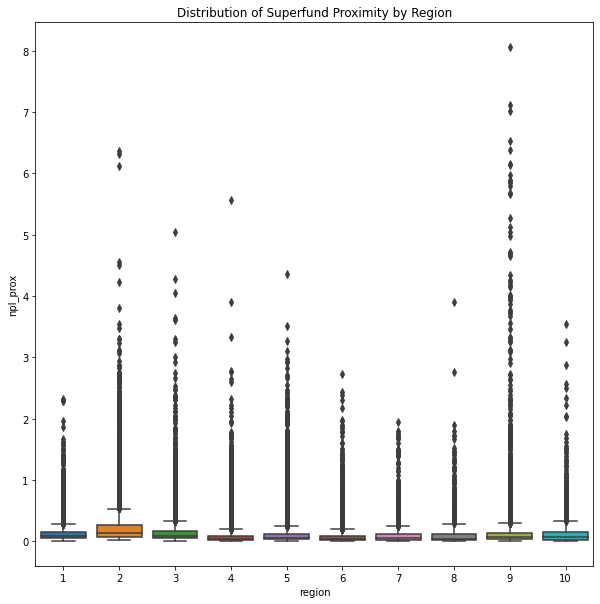

In [13]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Superfund Proximity by Region')
sns.boxplot(env['region'], env['npl_prox']);

The plot above represents the distribution of superfund proximity for each region. There is some slight variation in the distributions, with Region 2 having a larger interquartile range than any of the other regions. The entirety of the boxplot for each region, excluding outliers, is under 1. Every region has many outliers, ranging all the way to a superfund proximity of roughly 8 in Region 9. 

In [14]:
env.groupby('region')['rmp_prox'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.627626,0.833390,0.010558,0.111261,0.268445,0.823866,8.644721
2,7705.0,0.658228,0.921031,0.017307,0.139541,0.296995,0.807781,12.598708
3,7331.0,0.692913,0.934334,0.017727,0.133657,0.297918,0.884346,10.213013
4,13777.0,0.651037,0.912917,0.012017,0.119601,0.271349,0.820317,10.153860
5,13023.0,0.912338,1.149440,0.007896,0.173346,0.480706,1.220665,13.530489
6,8566.0,0.885367,1.209295,0.006326,0.158731,0.427361,1.152439,15.815071
7,3499.0,1.063342,1.154528,0.012358,0.229419,0.691585,1.440863,10.210545
8,2653.0,0.644593,0.807040,0.008881,0.143751,0.324481,0.848369,7.588711
9,10496.0,1.011660,1.464472,0.005603,0.182035,0.482438,1.237419,17.607654


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


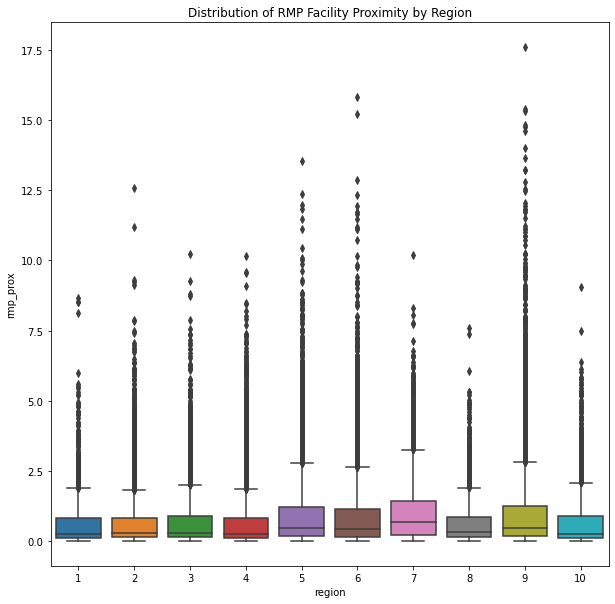

In [15]:
plt.figure(figsize = (10,10))
plt.title('Distribution of RMP Facility Proximity by Region')
sns.boxplot(env['region'], env['rmp_prox']);

The plot above represents the distribution of RMP facility proximity for each region. There is some slight variation in the distributions, with Regions 5, 7 and 9 having larger interquartile ranges than any of the other regions. Every region has many outliers, ranging all the way to a RMP facility proximity of over 17.5 in Region 9. 

In [16]:
env.groupby('region')['traffic_prox'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3217.0,1370.352707,3266.221578,0.001668,125.350522,443.805901,1294.230827,42063.593145
2,7614.0,846.077828,1231.709706,0.001149,144.497930,415.893673,1004.160863,15135.219025
3,7121.0,730.588980,1302.570545,0.000727,95.810581,336.052461,834.041187,23072.081354
4,13232.0,457.103798,924.288460,0.000410,42.871309,172.566030,511.383815,25481.534146
5,12655.0,683.136010,1186.510840,0.000630,94.032382,311.384415,778.443836,22114.272146
6,8257.0,531.012266,915.333184,0.000241,77.641233,232.113949,571.668664,13313.271626
7,3339.0,440.708511,838.159349,0.000720,37.077641,177.080107,478.532277,12819.730868
8,2592.0,511.865739,765.962898,0.000149,66.899740,269.182912,635.549966,11935.137537
9,10387.0,1349.466674,2529.840584,0.000032,122.170035,428.808233,1371.586903,34647.430696


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


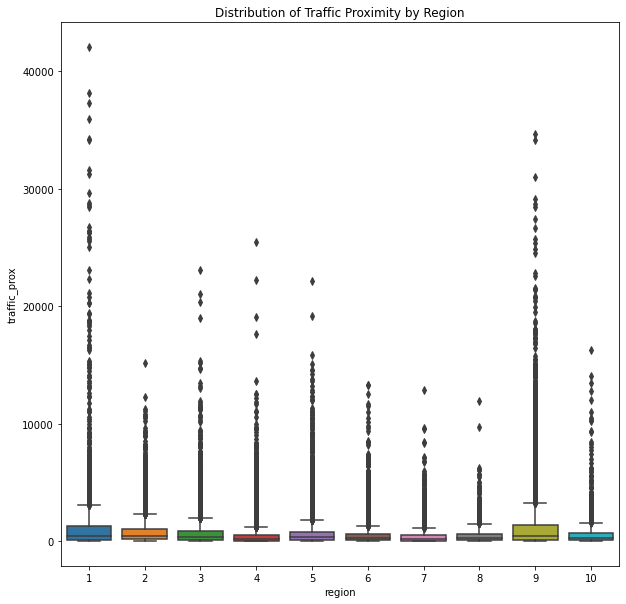

In [17]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Traffic Proximity by Region')
sns.boxplot(env['region'], env['traffic_prox']);

The plot above represents the distribution of traffic proximity for each region. There is some slight variation in the distributions, with Regions 1 and 9 having larger interquartile ranges than any of the other regions. The entirety of the boxplot for each region, excluding outliers, is under 5000. Every region has many outliers, ranging all the way to a traffic proximity of over 40000 in Region 1. 

In [18]:
env.groupby('region')['waste_prox'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,3.960302,6.806546,0.010797,0.409214,1.920233,4.459875,57.751593
2,7705.0,4.719307,6.436252,0.019681,0.483778,2.342640,6.231826,47.000513
3,7331.0,2.073006,3.782489,0.012833,0.183845,0.722269,2.330712,46.925941
4,13777.0,0.685566,1.097985,0.010753,0.100992,0.226664,0.795538,14.643542
5,13023.0,1.912766,2.489780,0.007322,0.205762,1.041932,2.635188,26.455067
6,8566.0,0.908021,1.300596,0.004855,0.104269,0.359800,1.193828,13.606208
7,3499.0,1.080501,1.475078,0.007000,0.068761,0.414551,1.508154,9.450530
8,2653.0,0.738680,0.941992,0.004952,0.063004,0.355598,1.076996,7.191161
9,10496.0,4.529208,4.553011,0.005430,1.143693,2.981858,6.565626,35.643179


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


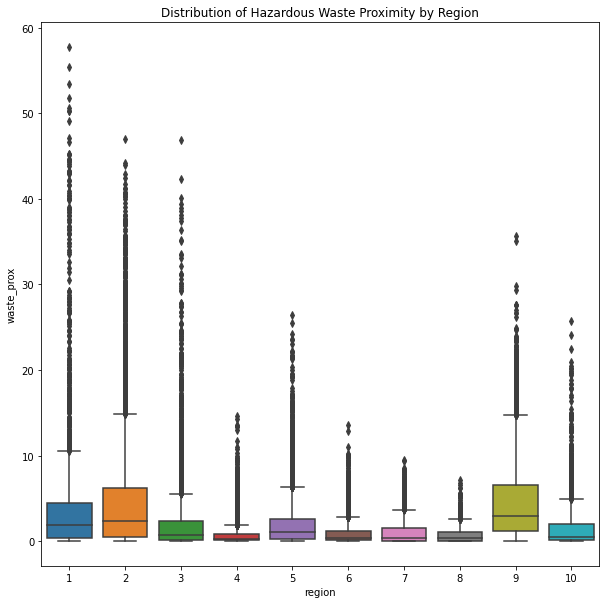

In [19]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Hazardous Waste Proximity by Region')
sns.boxplot(env['region'], env['waste_prox']);

The plot above represents the distribution of hazardous waste proximity for each region. There is variation in the distributions, with Regions 2 and 9 having larger interquartile ranges than any of the other regions, and Regions 4 and 8 having smaller interquartile ranges than the other regions. The median for each region ranges from slightly above 0 to roughly 3. Every region has many outliers, ranging all the way to a hazardous waste proximity of roughly 58 in Region 1. 

In [20]:
env.groupby('region')['undgrd_stor'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,3.194212,4.515356,0.0,0.382398,1.528899,4.265220,46.799733
2,7705.0,9.243245,13.281436,0.0,0.466903,3.482115,13.128265,154.788486
3,7331.0,2.919151,4.366045,0.0,0.337532,1.430671,3.694863,68.460827
4,13777.0,3.852647,6.294276,0.0,0.350052,1.563073,4.534623,81.917067
5,13023.0,5.560437,8.253586,0.0,0.530817,2.443694,7.040128,84.781368
6,8566.0,2.229270,2.495401,0.0,0.360313,1.527931,3.286163,31.114518
7,3499.0,2.770133,4.457685,0.0,0.160125,1.184987,3.593606,69.679229
8,2653.0,2.792015,4.312551,0.0,0.224383,1.420936,3.708190,78.076904
9,10496.0,3.499068,4.536634,0.0,0.597430,2.087621,4.550748,54.782787


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


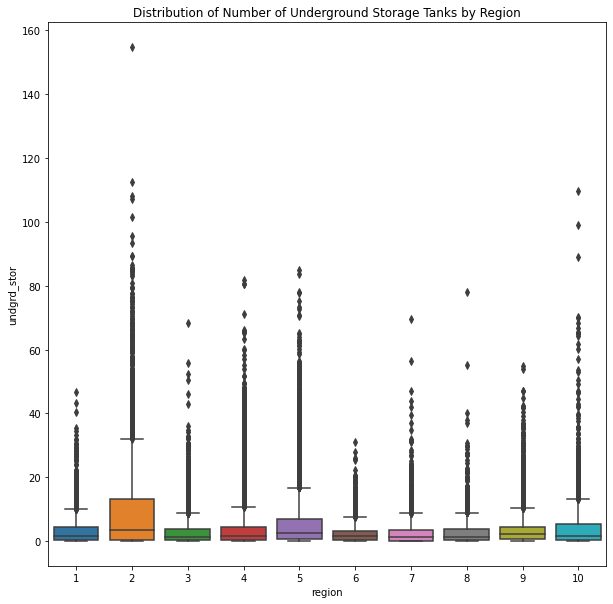

In [21]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Number of Underground Storage Tanks by Region')
sns.boxplot(env['region'], env['undgrd_stor']);

The plot above represents the distribution of number of underground storage tanks for each region. Region 2 has the largest interquartile range and a highter median than the other regions, with a median of around 3.5. The interquartile ranges for all the regions are under 20. Every region has many outliers, ranging all the way to an observation of roughly 155 underground storage tanks in Region 2. 

In [22]:
env.groupby('region')['pre_1960_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.462782,0.221326,0.0,0.282959,0.443585,0.646392,1.000000
2,7705.0,0.491415,0.269998,0.0,0.269669,0.503147,0.727009,1.000000
3,7331.0,0.388990,0.274607,0.0,0.150647,0.343190,0.620932,1.000000
4,13777.0,0.174365,0.182989,0.0,0.036392,0.116849,0.239310,0.977667
5,13023.0,0.418975,0.264032,0.0,0.198540,0.386783,0.636042,1.000000
6,8566.0,0.205152,0.215700,0.0,0.032183,0.128917,0.309821,1.000000
7,3499.0,0.375877,0.253527,0.0,0.147972,0.368687,0.574312,1.000000
8,2653.0,0.232750,0.228558,0.0,0.034997,0.158388,0.385226,0.949060
9,10496.0,0.261447,0.254777,0.0,0.030986,0.176974,0.452639,0.976869


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


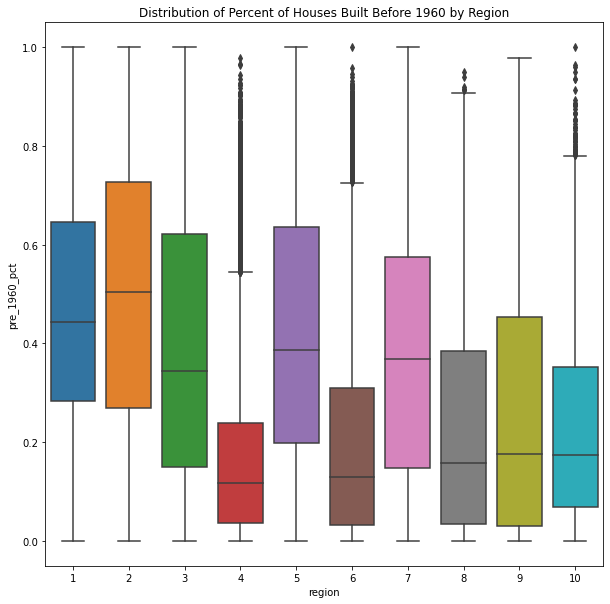

In [23]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Houses Built Before 1960 by Region')
sns.boxplot(env['region'], env['pre_1960_pct']);

The plot above represents the distribution of percentage of houses build before 1960 for each region. This is an indicator of likelihood of lead paint. There is variation in the distributions, with Region 4 having a significantly smaller interquartile range than the other regions. The medians of the distributions range from roughly 0.10 to 0.50. Regions 4, 6, 8, and 10 have outliers. Every region has a large range, with a minimum percentage of 0 and a maximum percentage of roughly 1. 

#### Distribution of Demographic Features by Region 

In [24]:
env.groupby('region')['pop'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,4410.012828,1735.965360,32.0,3109.00,4261.0,5553.0,13198.0
2,7705.0,4119.595977,1886.698049,39.0,2742.00,3877.0,5182.0,28109.0
3,7331.0,4190.133270,1866.554399,40.0,2824.00,3944.0,5273.0,19438.0
4,13777.0,4758.848225,2585.269431,61.0,3031.00,4349.0,5956.0,39928.0
5,13023.0,4022.590110,1947.701314,32.0,2696.00,3728.0,5009.0,29089.0
6,8566.0,4893.456572,3049.506122,34.0,2970.25,4372.0,6059.0,72041.0
7,3499.0,4020.975993,1970.739013,100.0,2662.50,3662.0,4981.5,32179.0
8,2653.0,4507.943083,2485.603264,53.0,2864.00,4156.0,5632.0,46482.0
9,10496.0,4830.029535,2222.278950,45.0,3405.00,4535.0,5872.0,38754.0


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


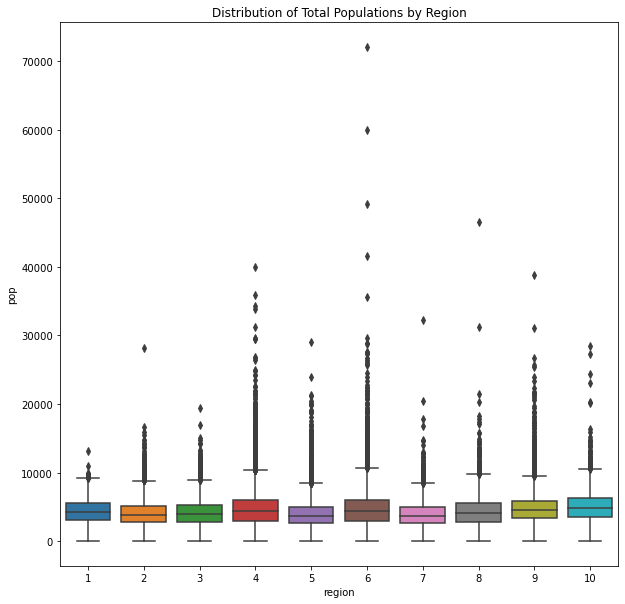

In [25]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Total Populations by Region')
sns.boxplot(env['region'], env['pop']);

The plot above represents the distribution of total population for each region. The interquartile ranges for all the regions are fairly similar. The medians of the regions range from roughly 3500 to 5000. Every region has many outliers, ranging all the way to an observation of a total population of roughly 72000 in Region 2. 

In [26]:
env.groupby('region')['poc_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.252852,0.247855,0.000000,0.070989,0.149281,0.350781,1.000000
2,7705.0,0.510054,0.353435,0.000000,0.175323,0.443593,0.905823,1.000000
3,7331.0,0.327752,0.290639,0.000000,0.085457,0.230769,0.504303,1.000000
4,13777.0,0.382974,0.281592,0.000000,0.144373,0.315204,0.576923,1.000000
5,13023.0,0.283251,0.285523,0.000000,0.069503,0.163825,0.398983,1.000000
6,8566.0,0.512789,0.280016,0.003471,0.273730,0.475111,0.760063,1.000000
7,3499.0,0.210352,0.221401,0.000000,0.061400,0.128188,0.263129,1.000000
8,2653.0,0.243518,0.196417,0.000000,0.103635,0.180836,0.323832,0.991048
9,10496.0,0.586028,0.264912,0.000000,0.357073,0.589939,0.832241,1.000000


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


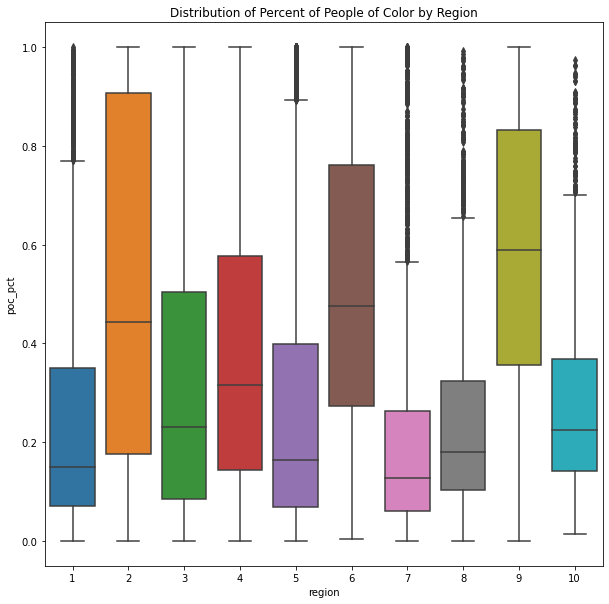

In [27]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People of Color by Region')
sns.boxplot(env['region'], env['poc_pct']);

The plot above represents the distribution of the percent of people of color for each region. There is variation in the distributions across regions. Region 2 has the largest interquartile region. The size of the interquartile ranges for Regions 3, 4, 6, and 9, are fairly similar and larger than the other regions besides Region 2. The minimum value of percent of people of color in all regions is roughly 0. The maximum value of percent of people of color in all regions is roughly 1. The medians of the regions range from roughly 0.15 to 0.55. Regions 1, 5, 7, 8, and 10 have outliers, while the other regions do not. 

In [28]:
env.groupby('region')['low_inc_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.250837,0.165412,0.0,0.124463,0.202996,0.346321,1.000000
2,7705.0,0.338185,0.231023,0.0,0.152358,0.278057,0.483513,1.000000
3,7331.0,0.285793,0.174846,0.0,0.149751,0.257552,0.387630,1.000000
4,13777.0,0.373025,0.173348,0.0,0.240069,0.366146,0.490085,1.000000
5,13023.0,0.326700,0.187105,0.0,0.182600,0.291905,0.435161,1.000000
6,8566.0,0.384603,0.184587,0.0,0.244591,0.377173,0.516781,1.000000
7,3499.0,0.325221,0.164463,0.0,0.207692,0.305381,0.424857,1.000000
8,2653.0,0.282933,0.153433,0.0,0.166267,0.263427,0.367663,1.000000
9,10496.0,0.317045,0.184186,0.0,0.165820,0.281860,0.447903,1.000000


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


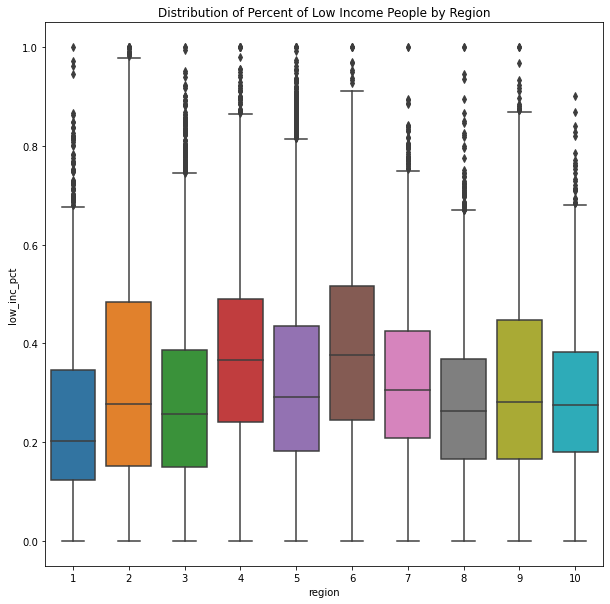

In [29]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Low Income People by Region')
sns.boxplot(env['region'], env['low_inc_pct']);

The plot above represents the distribution of the percent of people who are low income for each region. There is some variation in the distributions across regions, although the size of the interquartile ranges are similar. The minimum value of percent of low income people in all regions is roughly 0. The maximum value of percent of low income people in all regions except Region 10 is roughly 1, while the maximum value in Region 10 is roughly 0.85. The medians of the regions range from roughly 0.20 to 0.37. All regions have some outliers.

In [30]:
env.groupby('region')['sub_hs_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.095973,0.084421,0.0,0.039615,0.068574,0.123453,0.682091
2,7705.0,0.141337,0.108222,0.0,0.058866,0.110190,0.202290,1.000000
3,7331.0,0.104361,0.077142,0.0,0.049183,0.087166,0.140102,0.816566
4,13777.0,0.134380,0.086337,0.0,0.065934,0.122197,0.188420,0.658599
5,13023.0,0.105248,0.082747,0.0,0.048939,0.083778,0.136380,0.718519
6,8566.0,0.166594,0.123338,0.0,0.073699,0.138220,0.230487,1.000000
7,3499.0,0.099702,0.076475,0.0,0.047655,0.080039,0.129662,0.559540
8,2653.0,0.081962,0.070581,0.0,0.034314,0.062403,0.107081,0.541935
9,10496.0,0.163959,0.140603,0.0,0.053968,0.115405,0.244214,0.762928


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


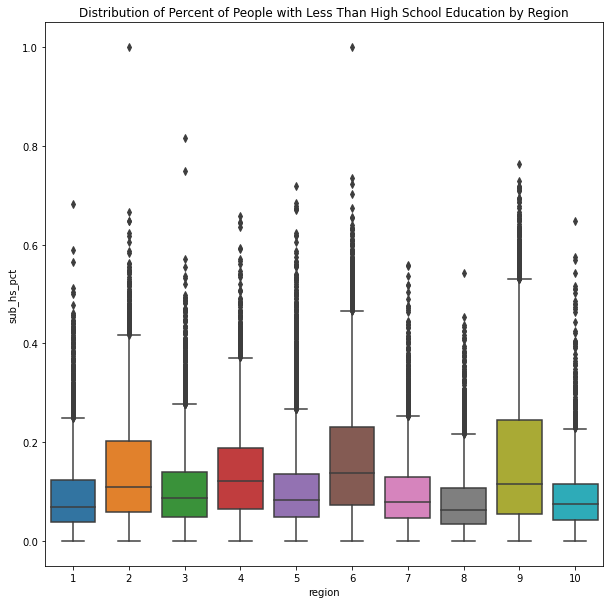

In [31]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People with Less Than High School Education by Region')
sns.boxplot(env['region'], env['sub_hs_pct']);

The plot above represents the distribution of the percent of people who have less than high school education for each region. There is some variation in the distributions across regions. Regions 2, 6, and 9 have larger interquartile ranges than the other regions. The minimum value of percent of people with less than high school education in all regions is 0. The maximum value of percent of people with less than high school education ranges from roughly 0.55 to 1. The medians of the regions range from roughly 0.05 to 0.15. All regions have some outliers, with the highest outliers of 1 in Regions 2 and 6.

In [32]:
env.groupby('region')['ling_iso_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.047569,0.070593,0.0,0.003947,0.018652,0.058324,0.498041
2,7705.0,0.148884,0.221928,0.0,0.012453,0.046527,0.168264,1.000000
3,7331.0,0.025254,0.046316,0.0,0.000000,0.008729,0.029351,0.782994
4,13777.0,0.033636,0.067265,0.0,0.000000,0.010655,0.034169,1.000000
5,13023.0,0.024305,0.046527,0.0,0.000000,0.006792,0.025852,0.560000
6,8566.0,0.061882,0.092601,0.0,0.006277,0.026444,0.077488,0.788929
7,3499.0,0.019546,0.039518,0.0,0.000000,0.005937,0.021295,0.647059
8,2653.0,0.020990,0.034381,0.0,0.000000,0.008141,0.024180,0.309010
9,10496.0,0.085377,0.091200,0.0,0.020547,0.055728,0.121916,1.000000


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


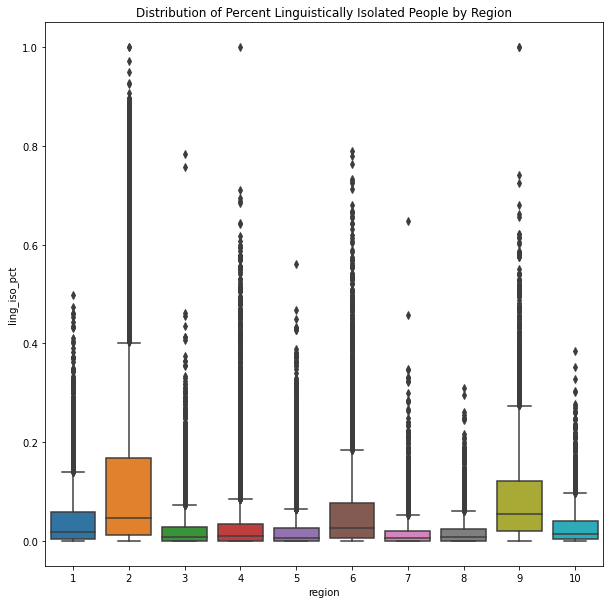

In [33]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent Linguistically Isolated People by Region')
sns.boxplot(env['region'], env['ling_iso_pct']);

The plot above represents the distribution of the percent of people who are linguistically isolated for each region. There is some variation in the distributions across regions. Regions 2 and 9 have larger interquartile ranges than the other regions. The minimum value of percent of people who are linguistically isolated in all regions is 0. The maximum value of percent of people who are linguistically isolated ranges from roughly 0.30 to 1. The medians of the regions range from roughly 0.00 to 0.05. All regions have some outliers, with the highest outliers of 1 in Regions 2, 4, and 9.

In [34]:
env.groupby('region')['under_5_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.050718,0.021870,0.0,0.036554,0.048418,0.063179,0.187500
2,7705.0,0.056488,0.027674,0.0,0.038625,0.053130,0.070490,0.323529
3,7331.0,0.057052,0.025050,0.0,0.040916,0.054194,0.070492,0.365672
4,13777.0,0.057139,0.026413,0.0,0.039868,0.055298,0.071879,0.251805
5,13023.0,0.059535,0.024927,0.0,0.043671,0.057104,0.072885,0.301959
6,8566.0,0.066619,0.027213,0.0,0.048477,0.064606,0.082462,0.224619
7,3499.0,0.062637,0.023247,0.0,0.047739,0.060657,0.075168,0.214760
8,2653.0,0.063392,0.027149,0.0,0.044995,0.061263,0.080084,0.242812
9,10496.0,0.060089,0.027178,0.0,0.041918,0.058604,0.076290,0.320000


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


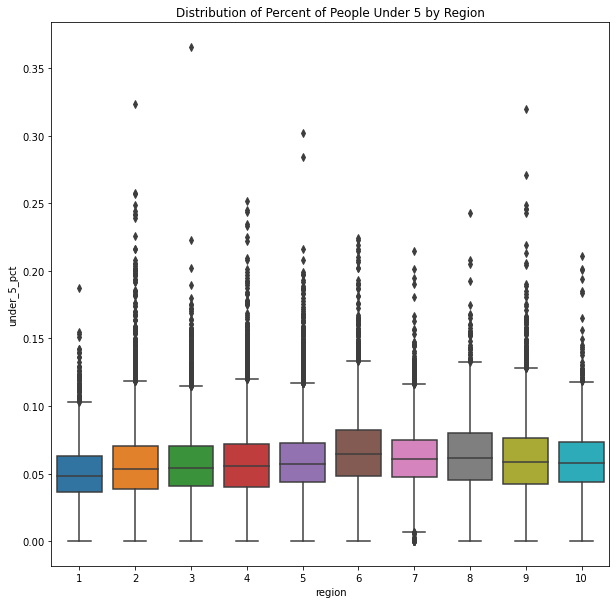

In [35]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People Under 5 by Region')
sns.boxplot(env['region'], env['under_5_pct']);

The plot above represents the distribution of the percent of the population under 5 for each region. The distributions are very similar across regions. The minimum value of percent of the population under 5 in all regions is 0. The maximum value of percent of the population under 5 ranges from roughly 0.20 to 0.36. The medians of the regions range from roughly 0.04 to 0.06. All regions have some outliers, with the highest outlier of 0.36 in Region 3.

In [36]:
env.groupby('region')['over_64_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.173176,0.067306,0.0,0.130029,0.168764,0.209640,0.687500
2,7705.0,0.167650,0.073031,0.0,0.122346,0.161348,0.202055,0.922115
3,7331.0,0.169442,0.071041,0.0,0.122130,0.168280,0.211724,0.892591
4,13777.0,0.180296,0.099785,0.0,0.123582,0.164807,0.208655,0.880767
5,13023.0,0.163970,0.064557,0.0,0.120730,0.162099,0.200707,0.572774
6,8566.0,0.145057,0.066690,0.0,0.098882,0.139717,0.182680,0.846806
7,3499.0,0.167284,0.060053,0.0,0.126896,0.168410,0.206296,0.454112
8,2653.0,0.149190,0.070994,0.0,0.096518,0.142365,0.191327,0.827849
9,10496.0,0.156116,0.099030,0.0,0.095379,0.135572,0.190110,0.912525


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


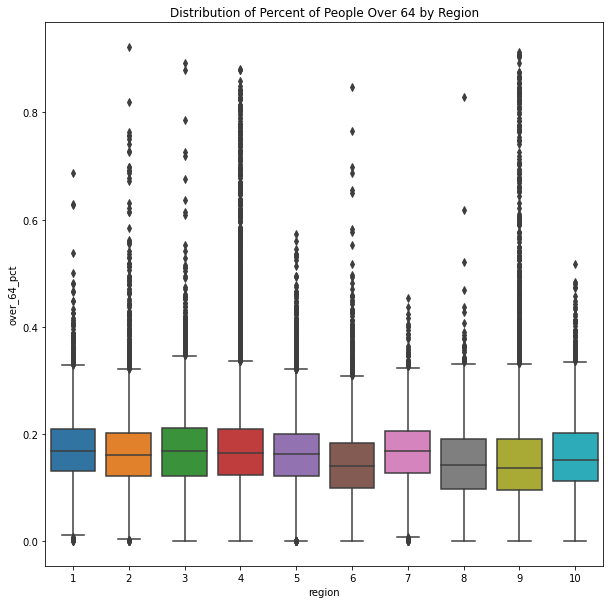

In [37]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People Over 64 by Region')
sns.boxplot(env['region'], env['over_64_pct']);

The plot above represents the distribution of the percent of the population over 65 for each region. The distributions are very similar across regions. The minimum value of percent of the population over 64 in all regions is 0. The maximum value of percent of the population over 64 ranges from roughly 0.45 to 0.90. The medians of the regions range from roughly 0.13 to 0.16. All regions have some outliers. 

In [38]:
env.groupby('region')['unemp_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,3352.0,0.052082,0.037882,0.0,0.029109,0.043681,0.063914,0.564103
2,7705.0,0.071569,0.065061,0.0,0.034014,0.052702,0.083704,0.720982
3,7331.0,0.056535,0.041809,0.0,0.029735,0.045881,0.070747,0.473684
4,13777.0,0.062117,0.043881,0.0,0.032446,0.052178,0.079736,0.555556
5,13023.0,0.060688,0.054017,0.0,0.027733,0.044854,0.073641,1.000000
6,8566.0,0.057576,0.039996,0.0,0.030739,0.048961,0.073649,0.457333
7,3499.0,0.043950,0.034484,0.0,0.021405,0.034878,0.056474,0.363462
8,2653.0,0.041283,0.032317,0.0,0.021086,0.035398,0.052567,0.356401
9,10496.0,0.061987,0.040077,0.0,0.035482,0.053775,0.079114,1.000000


C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


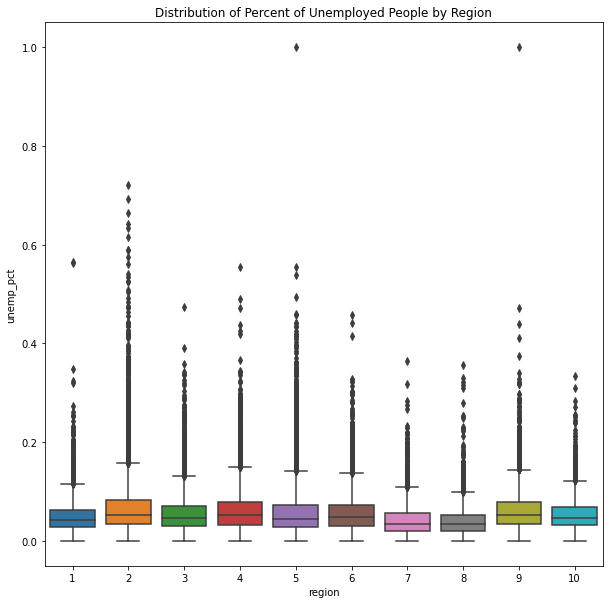

In [39]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Unemployed People by Region')
sns.boxplot(env['region'], env['unemp_pct']);

The plot above represents the distribution of the percent of the population that is unemployed for each region. The distributions are similar across regions. The minimum value of percent of the population that is unemployed in all regions is 0. The maximum value of percent of the population that is unemployed ranges from roughly 0.35 to 1. The medians of the regions range from roughly 0.03 to 0.05. All regions have some outliers, ranging all the way up to a value of 1 in Regions 5 and 9. 

### Environmental Features Boxplots (All Regions Aggregated)

In [40]:
env['cancer'].describe()

count    73134.000000
mean        28.514685
std         10.715290
min          8.000000
25%         20.000000
50%         30.000000
75%         30.000000
max       1000.000000
Name: cancer, dtype: float64

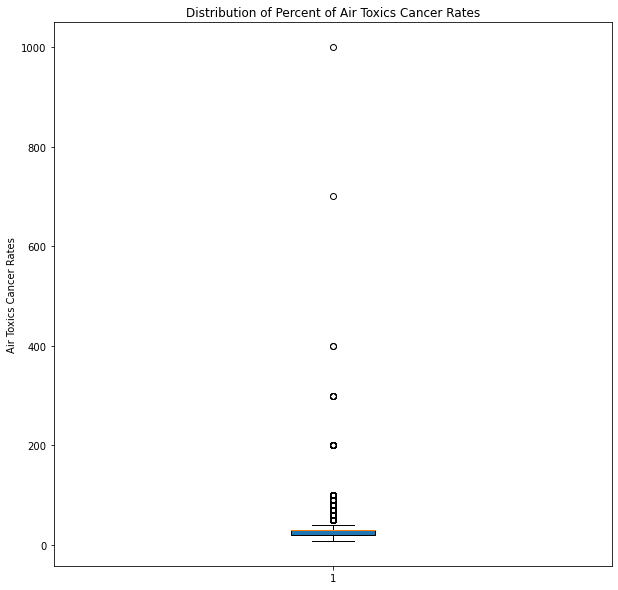

In [41]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Air Toxics Cancer Rates')
plt.ylabel('Air Toxics Cancer Rates')
plt.boxplot(env['cancer'], patch_artist = True);

The plot above represents the distribution of air toxics cancer rates (per million people) in the dataset. There are a few large outliers, one at roughly 700 and one at roughly 1000. The boxplot, excluding outliers, is under 100. The distribution ranges from 8 to 1000.

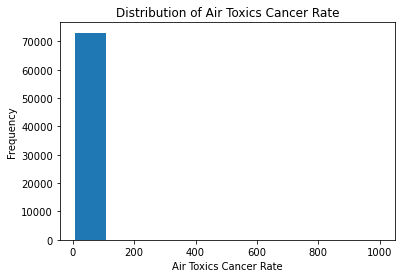

In [42]:
plt.title('Distribution of Air Toxics Cancer Rate')
plt.xlabel('Air Toxics Cancer Rate')
plt.ylabel('Frequency')
plt.hist(env['cancer']);

The plot above also helps visualize the distribution of air toxics cancer rate per million people. The data is extremely right skewed because of the significant outlier of 1000. The majority of the data is in the first bin of the histogram, between 0 and 100.

In [43]:
env['diesel_pm'].describe()

count    73134.000000
mean         0.299088
std          0.238210
min          0.000002
25%          0.139303
50%          0.244788
75%          0.383685
max          1.927320
Name: diesel_pm, dtype: float64

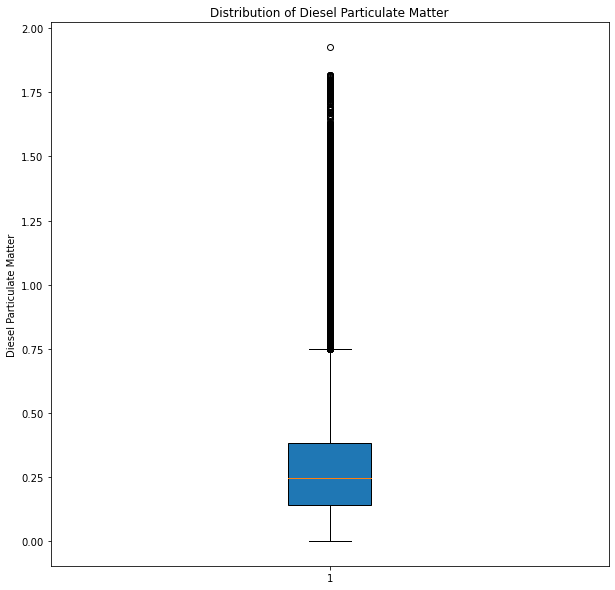

In [44]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Diesel Particulate Matter')
plt.ylabel('Diesel Particulate Matter')
plt.boxplot(env['diesel_pm'], patch_artist=True);

The plot above represents the distribution of diesel particulate matter in the dataset. There are many outliers, ranging up to roughly 2. The boxplot, excluding outliers, is under 1. The median is roughly 0.25. The distribution ranges from roughly 0 to 2.

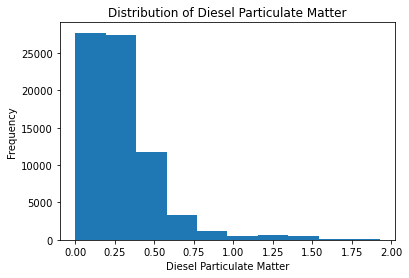

In [45]:
plt.title('Distribution of Diesel Particulate Matter')
plt.xlabel('Diesel Particulate Matter')
plt.ylabel('Frequency')
plt.hist(env['diesel_pm']);

The plot above also helps visualize the distribution of diesel particulate matter. The data is right skewed because of the outliers in the upper bounds. The majority of the data is between 0 and 0.60.

In [46]:
env['resp_index'].describe()

count    73134.000000
mean         0.360024
std          0.133770
min          0.070000
25%          0.300000
50%          0.400000
75%          0.400000
max          5.000000
Name: resp_index, dtype: float64

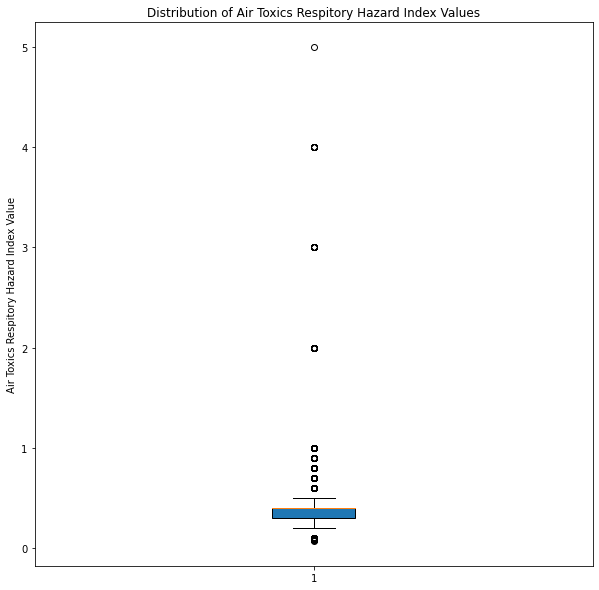

In [47]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Air Toxics Respitory Hazard Index Values')
plt.ylabel('Air Toxics Respitory Hazard Index Value')
plt.boxplot(env['resp_index'], patch_artist=True);

The plot above represents the distribution of the air toxics respitory hazard index values in the dataset. There are many outliers, ranging from roughly 0 on the lower bound up to roughly 5 on the upper bound. The boxplot, excluding outliers, is under 1. The distribution ranges from roughly 0 to 5.

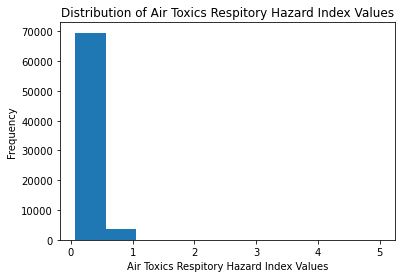

In [48]:
plt.title('Distribution of Air Toxics Respitory Hazard Index Values')
plt.xlabel('Air Toxics Respitory Hazard Index Values')
plt.ylabel('Frequency')
plt.hist(env['resp_index']);

The plot above also helps visualize the distribution of the air toxics respitory hazard index values. The data is right skewed because of the outliers in the upper bounds. The majority of the data is between 0 and 0.50.

In [49]:
env['npl_prox'].describe()

count    73134.000000
mean         0.135863
std          0.273129
min          0.001130
25%          0.027080
50%          0.061812
75%          0.133517
max          8.059139
Name: npl_prox, dtype: float64

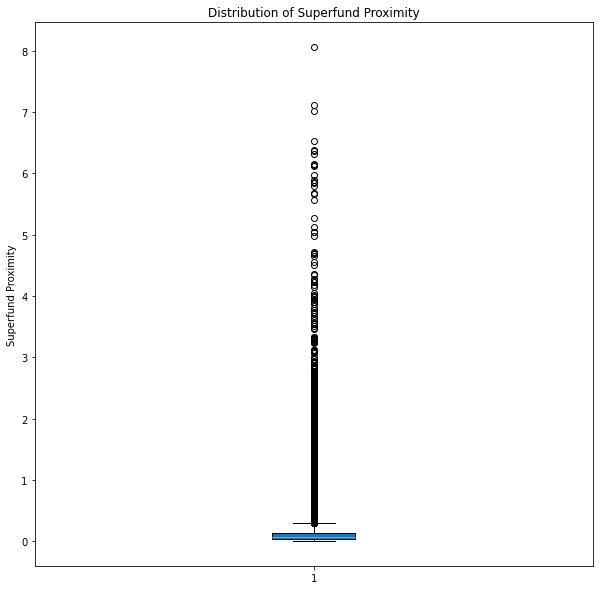

In [50]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Superfund Proximity')
plt.ylabel('Superfund Proximity')
plt.boxplot(env['npl_prox'], patch_artist=True);

The plot above represents the distribution of the superfund proximity in the dataset. There are many outliers, ranging up to roughly 8. The boxplot, excluding outliers, is under 0.5. The distribution ranges from roughly 0.00 to 8.

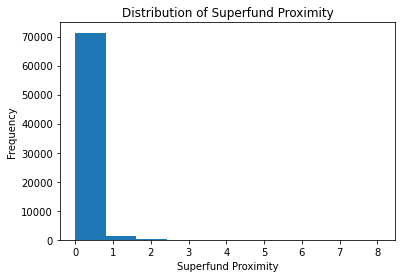

In [51]:
plt.title('Distribution of Superfund Proximity')
plt.xlabel('Superfund Proximity')
plt.ylabel('Frequency')
plt.hist(env['npl_prox']);

The plot above also helps visualize the distribution of the superfund proximity. The data is right skewed because of the outliers in the upper bounds. The majority of the data is between 0 and 1.

In [52]:
env['rmp_prox'].describe()

count    73134.000000
mean         0.800548
std          1.106072
min          0.001413
25%          0.148287
50%          0.366522
75%          1.033217
max         17.607654
Name: rmp_prox, dtype: float64

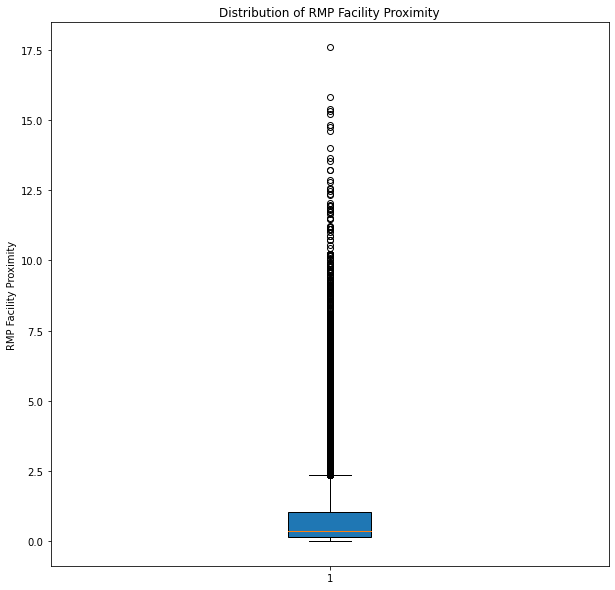

In [53]:
plt.figure(figsize = (10,10))
plt.title('Distribution of RMP Facility Proximity')
plt.ylabel('RMP Facility Proximity')
plt.boxplot(env['rmp_prox'], patch_artist=True);

The plot above represents the distribution of the RMP facility proximity in the dataset. There are many outliers, ranging up to roughly 17.5. The median is roughly 0.35. The distribution ranges from roughly 0.00 to 17.5.

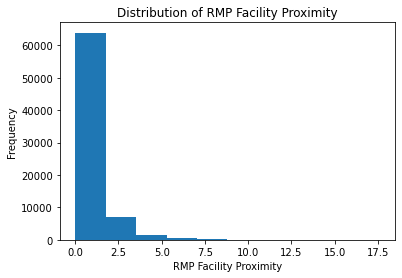

In [54]:
plt.title('Distribution of RMP Facility Proximity')
plt.xlabel('RMP Facility Proximity')
plt.ylabel('Frequency')
plt.hist(env['rmp_prox']);

The plot above also helps visualize the distribution of the RMP facility proximity. The data is right skewed because of the outliers in the upper bounds. The majority of the data is between 0 and 3.

In [55]:
env['traffic_prox'].describe()

count    71058.000000
mean       753.616323
std       1568.904746
min          0.000032
25%         81.149428
50%        289.161871
75%        769.586871
max      42063.593145
Name: traffic_prox, dtype: float64

Because we have not yet imputed values for the null values in this column, we cannot plot the boxplot in matplotlib.

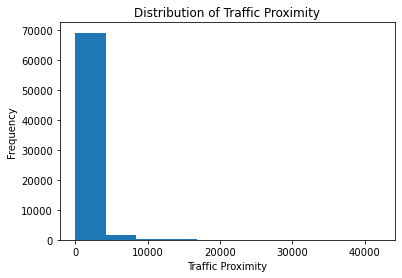

In [56]:
plt.title('Distribution of Traffic Proximity')
plt.xlabel('Traffic Proximity')
plt.ylabel('Frequency')
plt.hist(env['traffic_prox']);

The plot above helps visualize the distribution of traffic proximity. The data is right skewed because of the outliers in the upper bounds, with a maximum value of roughly 40000. The majority of the data is between 0 and 5000.

In [57]:
env['waste_prox'].describe()

count    73134.000000
mean         2.252700
std          3.903354
min          0.001280
25%          0.160045
50%          0.790275
75%          2.643630
max         57.751593
Name: waste_prox, dtype: float64

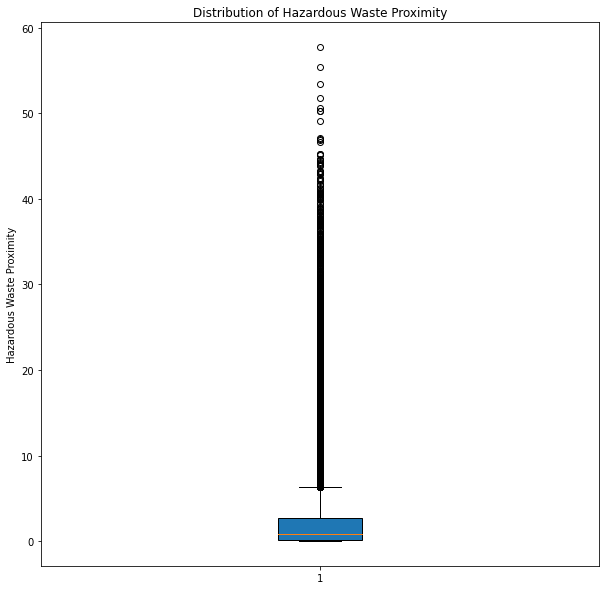

In [58]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Hazardous Waste Proximity')
plt.ylabel('Hazardous Waste Proximity')
plt.boxplot( env['waste_prox'], patch_artist=True);

The plot above represents the distribution of proximity to hazardous waste in the dataset. There are many outliers, ranging up to roughly 60. The median is roughly 1. The boxplot, excluding outliers, is under 10. The distribution ranges from roughly 0.00 to 60.

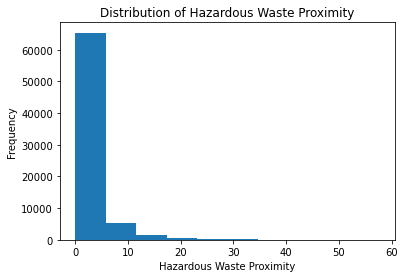

In [59]:
plt.title('Distribution of Hazardous Waste Proximity')
plt.xlabel('Hazardous Waste Proximity')
plt.ylabel('Frequency')
plt.hist(env['waste_prox']);

The plot above also helps visualize the distribution of proximity to hazardous waste. The data is right skewed because of the outliers in the upper bounds, with a maximum value of roughly 60. The majority of the data is between 0 and 5.

In [60]:
env['undgrd_stor'].describe()

count    73134.000000
mean         4.294490
std          7.260914
min          0.000000
25%          0.395826
50%          1.821191
75%          4.883517
max        154.788486
Name: undgrd_stor, dtype: float64

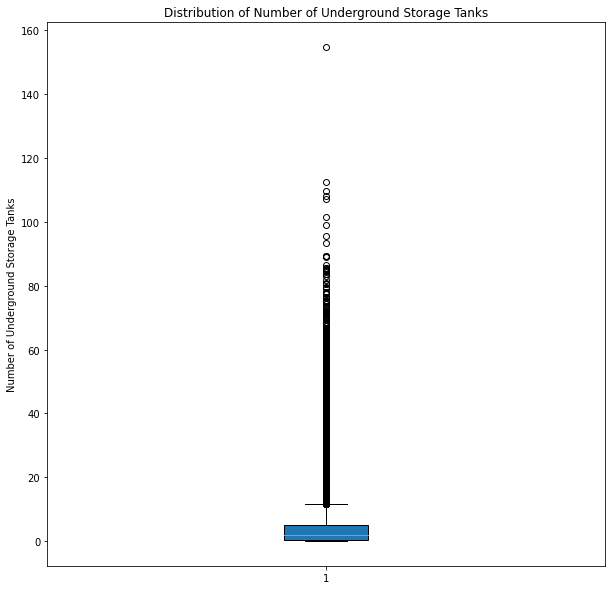

In [61]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Number of Underground Storage Tanks')
plt.ylabel('Number of Underground Storage Tanks')
plt.boxplot(env['undgrd_stor'], patch_artist=True);

The plot above represents the distribution of the number of underground storage tanks in the dataset. There are many outliers, ranging up to roughly 150. The median is roughly 2. The boxplot, excluding outliers, is under 20. The distribution ranges from roughly 0.00 to 150.

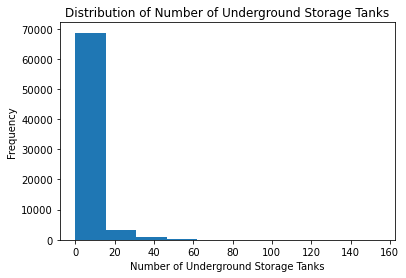

In [62]:
plt.title('Distribution of Number of Underground Storage Tanks')
plt.xlabel('Number of Underground Storage Tanks')
plt.ylabel('Frequency')
plt.hist(env['undgrd_stor']);

The plot above also helps visualize the distribution of the number of underground storage tanks. The data is right skewed because of the outliers in the upper bounds, with a maximum value of roughly 150. The majority of the data is between 0 and 15.

In [63]:
env['pre_1960_pct'].describe()

count    73134.000000
mean         0.316302
std          0.265581
min          0.000000
25%          0.078589
50%          0.250709
75%          0.512139
max          1.000000
Name: pre_1960_pct, dtype: float64

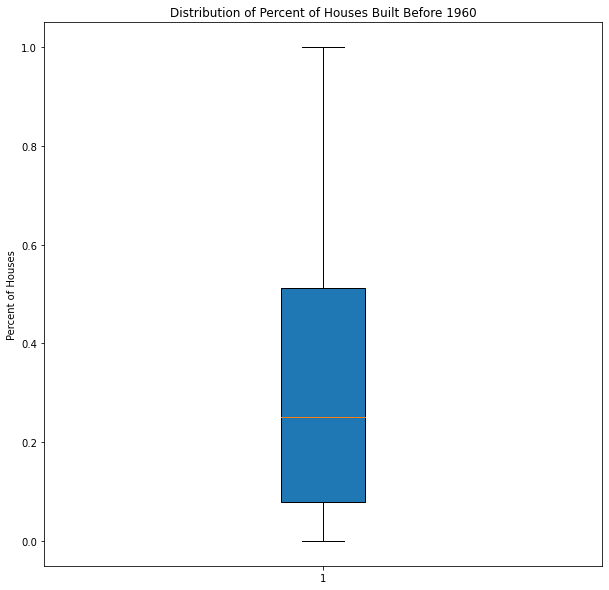

In [64]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Houses Built Before 1960')
plt.ylabel('Percent of Houses')
plt.boxplot(env['pre_1960_pct'], patch_artist=True);

The plot above represents the distribution of the percent of houses built before 1960 in the dataset. There are no outliers. The median is roughly 0.25. The distribution ranges from roughly 0 to 1.

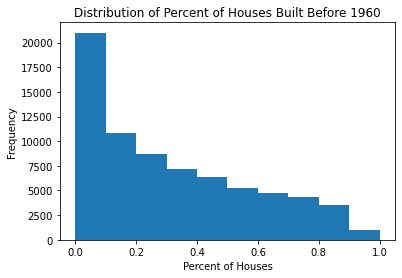

In [65]:
plt.title('Distribution of Percent of Houses Built Before 1960')
plt.xlabel('Percent of Houses')
plt.ylabel('Frequency')
plt.hist(env['pre_1960_pct']);

The plot above also helps visualize the distribution of the percent of houses built before 1960. The data is right skewed  with a maximum value of 1.

#### Demographic Features Boxplots (All Regions Aggregated)

In [66]:
env['pop'].describe()

count    73134.000000
mean      4482.478054
std       2312.459338
min         32.000000
25%       2944.000000
50%       4146.000000
75%       5572.000000
max      72041.000000
Name: pop, dtype: float64

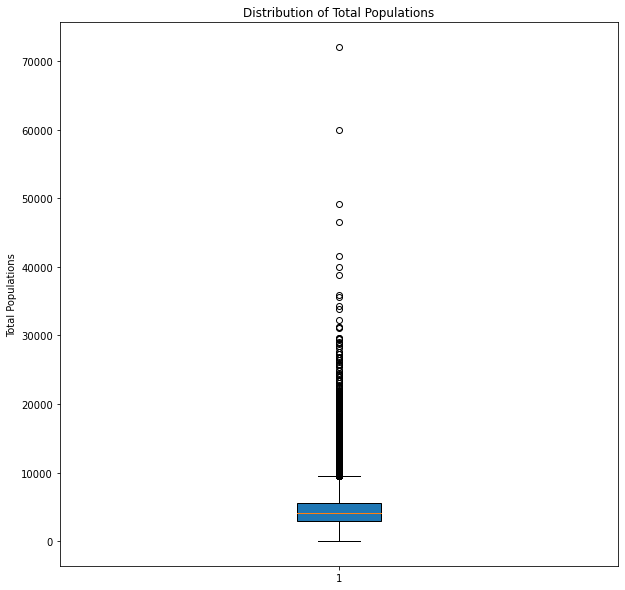

In [67]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Total Populations')
plt.ylabel('Total Populations')
plt.boxplot(env['pop'], patch_artist=True);

The plot above represents the distribution of the total populations in the dataset. There are many outliers, ranging up to roughly 70,000. The median is roughly 4000. The boxplot, excluding outliers, is under 11000. The distribution ranges from roughly 30 to 70000.

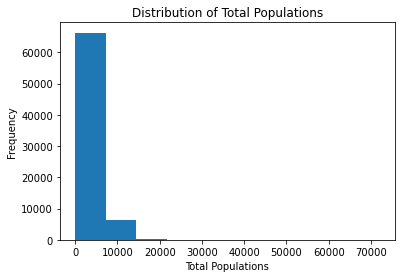

In [68]:
plt.hist(env['pop'])
plt.title('Distribution of Total Populations')
plt.xlabel('Total Populations')
plt.ylabel('Frequency');

The plot above also helps visualize the distribution of the total populations. The data is right skewed because of the outliers in the upper bounds, with a maximum value of roughly 70000. The majority of the data is between 0 and 5000.

In [69]:
env['poc_pct'].describe()

count    73134.000000
mean         0.394048
std          0.304912
min          0.000000
25%          0.129972
50%          0.309138
75%          0.628283
max          1.000000
Name: poc_pct, dtype: float64

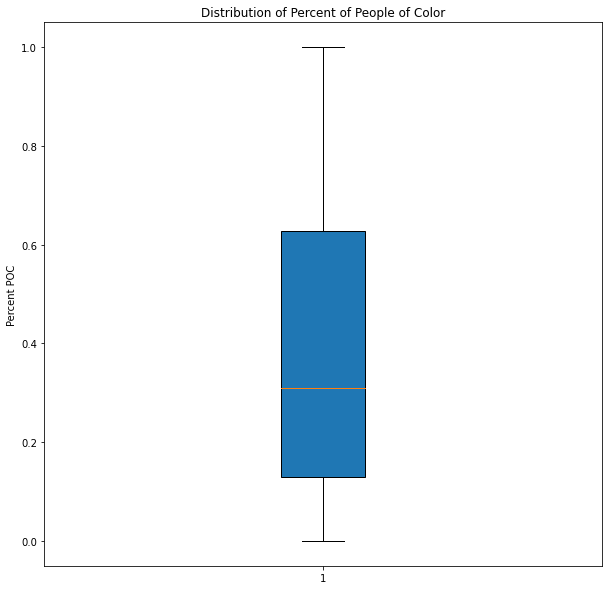

In [70]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People of Color')
plt.ylabel('Percent POC')
plt.boxplot(env['poc_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people of color in the dataset. There are no outliers. The median is roughly 0.3. The distribution ranges from roughly 0 to 1.

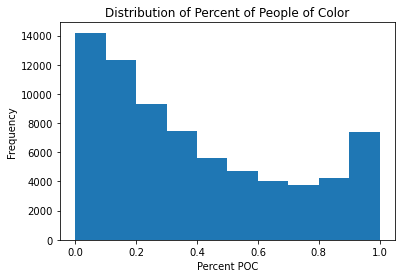

In [71]:
plt.title('Distribution of Percent of People of Color')
plt.xlabel('Percent POC')
plt.ylabel('Frequency')
plt.hist(env['poc_pct']);

The plot above also helps visualize the distribution of the percent of people of color. The data has a bimodel shape, higher frequency on the lower bound and again on the upper bound.

In [72]:
env['low_inc_pct'].describe()

count    73134.000000
mean         0.331449
std          0.187019
min          0.000000
25%          0.183062
50%          0.304162
75%          0.452513
max          1.000000
Name: low_inc_pct, dtype: float64

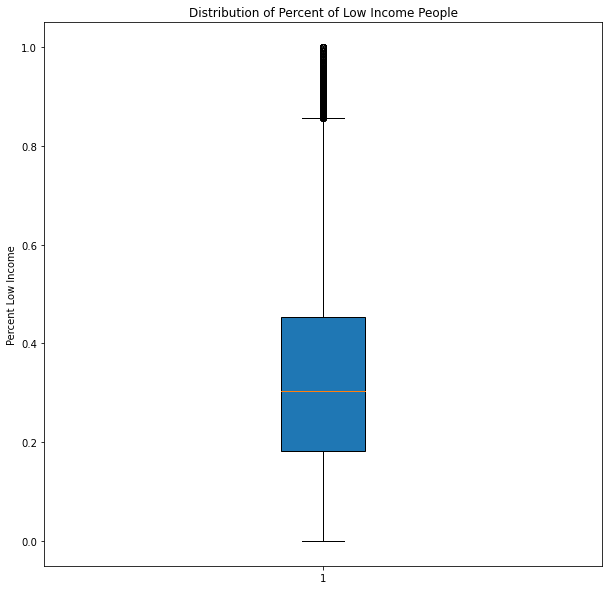

In [73]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Low Income People')
plt.ylabel('Percent Low Income')
plt.boxplot(env['low_inc_pct'], patch_artist=True);

The plot above represents the distribution of the percent of low income people in the dataset. There are some outliers, ranging up to 1. The median is roughly 0.3. The boxplot, excluding outliers, is under 0.9. The distribution ranges from roughly 0 to 1.

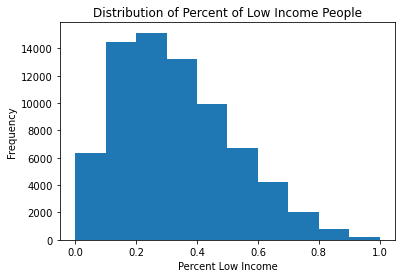

In [74]:
plt.title('Distribution of Percent of Low Income People')
plt.xlabel('Percent Low Income')
plt.ylabel('Frequency')
plt.hist(env['low_inc_pct']);

The plot above also helps visualize the distribution of the percent of low income people. The data has a right skew, although not as extreme as some of the distributions above. 

In [75]:
env['sub_hs_pct'].describe()

count    73134.000000
mean         0.128000
std          0.103938
min          0.000000
25%          0.052931
50%          0.099136
75%          0.173651
max          1.000000
Name: sub_hs_pct, dtype: float64

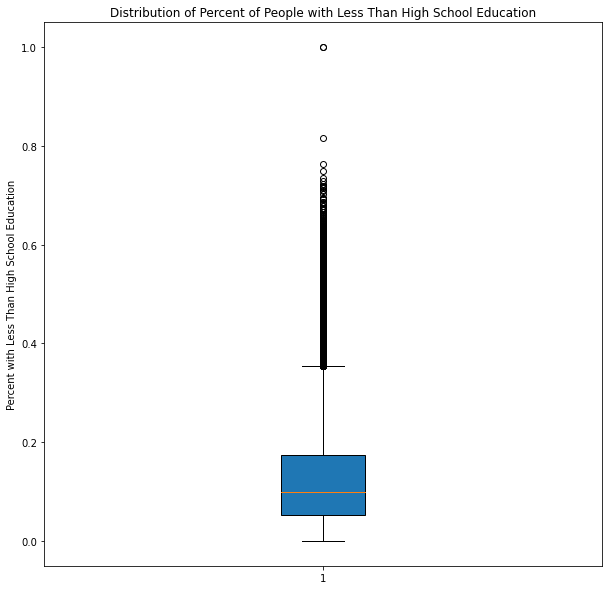

In [76]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People with Less Than High School Education')
plt.ylabel('Percent with Less Than High School Education')
plt.boxplot(env['sub_hs_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people with less than high school education in the dataset. There are some outliers, ranging up to 1. The median is roughly 0.10. The boxplot, excluding outliers, is under 0.40. The distribution ranges from roughly 0 to 1.

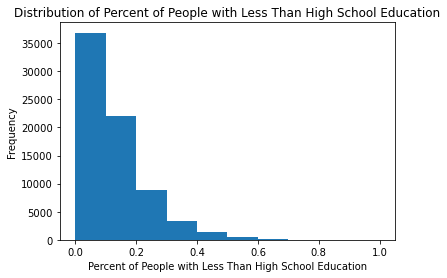

In [77]:
plt.title('Distribution of Percent of People with Less Than High School Education')
plt.xlabel('Percent of People with Less Than High School Education')
plt.ylabel('Frequency')
plt.hist(env['sub_hs_pct']);

The plot above also helps visualize the distribution of the percent of people with less than high school education. The data has a right skew due to the outliers in the upper bounds. The maximum value is 1.  

In [78]:
env['ling_iso_pct'].describe()

count    73134.000000
mean         0.053400
std          0.103858
min          0.000000
25%          0.000000
50%          0.016559
75%          0.055925
max          1.000000
Name: ling_iso_pct, dtype: float64

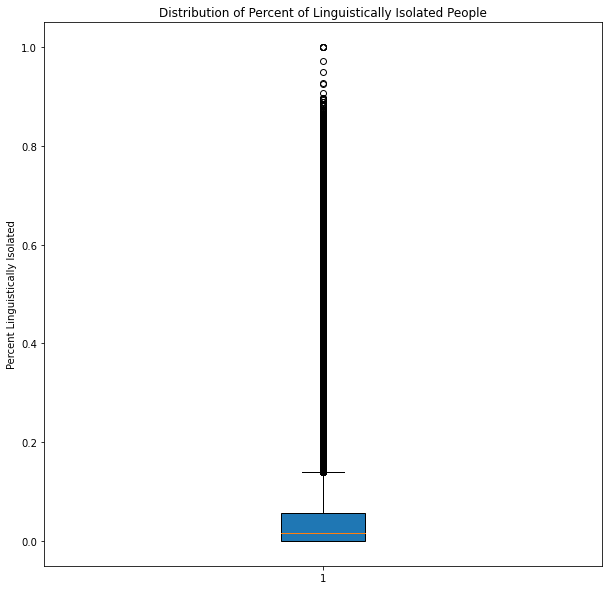

In [79]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Linguistically Isolated People')
plt.ylabel('Percent Linguistically Isolated')
plt.boxplot(env['ling_iso_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people who are linguistically isolated in the dataset. There are some outliers, ranging up to 1. The median is roughly 0.01. The boxplot, excluding outliers, is under 0.20. The distribution ranges from roughly 0 to 1.

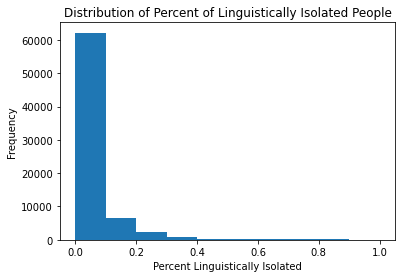

In [80]:
plt.title('Distribution of Percent of Linguistically Isolated People')
plt.xlabel('Percent Linguistically Isolated')
plt.ylabel('Frequency')
plt.hist(env['ling_iso_pct']);

The plot above also helps visualize the distribution of the percent of people who are linguistically isolated. The data has a right skew due to the outliers in the upper bounds. The maximum value is 1.  

In [81]:
env['under_5_pct'].describe()

count    73134.000000
mean         0.059291
std          0.026220
min          0.000000
25%          0.042152
50%          0.057039
75%          0.073918
max          0.365672
Name: under_5_pct, dtype: float64

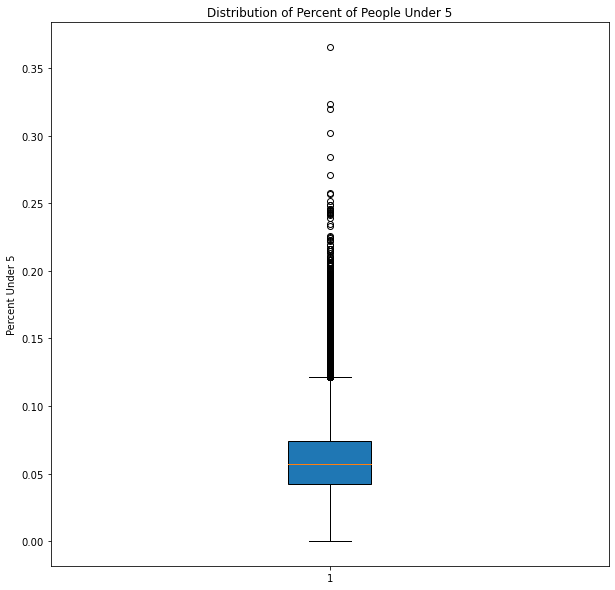

In [82]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People Under 5')
plt.ylabel('Percent Under 5')
plt.boxplot(env['under_5_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people who are under 5 in the dataset. There are some outliers, ranging up to roughly 0.35. The median is roughly 0.06. The boxplot, excluding outliers, is under 0.15. The distribution ranges from roughly 0 to 0.35.

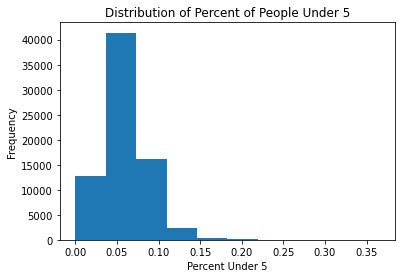

In [83]:
plt.title('Distribution of Percent of People Under 5')
plt.xlabel('Percent Under 5')
plt.ylabel('Frequency')
plt.hist(env['under_5_pct']);

The plot above also helps visualize the distribution of the percent of people who are under 5. The data has a right skew due to the outliers in the upper bounds, although a less extreme skew than some of the other feature histograms. The maximum value is roughly 0.35.

In [84]:
env['over_64_pct'].describe()

count    73134.000000
mean         0.164645
std          0.080511
min          0.000000
25%          0.113748
50%          0.157026
75%          0.200934
max          0.922115
Name: over_64_pct, dtype: float64

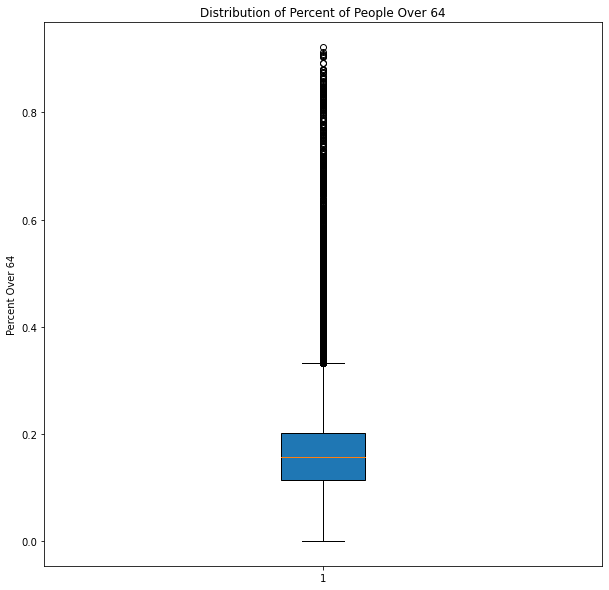

In [85]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of People Over 64')
plt.ylabel('Percent Over 64')
plt.boxplot(env['over_64_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people who are over 64 in the dataset. There are some outliers, ranging up to roughly 0.90. The median is roughly 0.15. The boxplot, excluding outliers, is under 0.40. The distribution ranges from roughly 0 to 0.90.

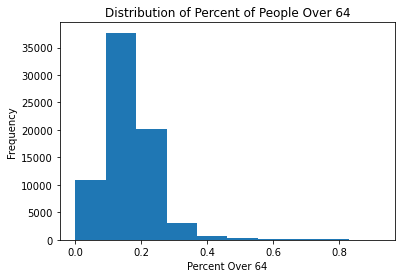

In [86]:
plt.title('Distribution of Percent of People Over 64')
plt.xlabel('Percent Over 64')
plt.ylabel('Frequency')
plt.hist(env['over_64_pct']);

The plot above also helps visualize the distribution of the percent of people who are over 64. The data has a right skew due to the outliers in the upper bounds, although a less extreme skew than some of the other feature histograms. The maximum value is roughly 0.90.  

In [87]:
env['unemp_pct'].describe()

count    73134.000000
mean         0.059366
std          0.046579
min          0.000000
25%          0.030165
50%          0.047974
75%          0.074014
max          1.000000
Name: unemp_pct, dtype: float64

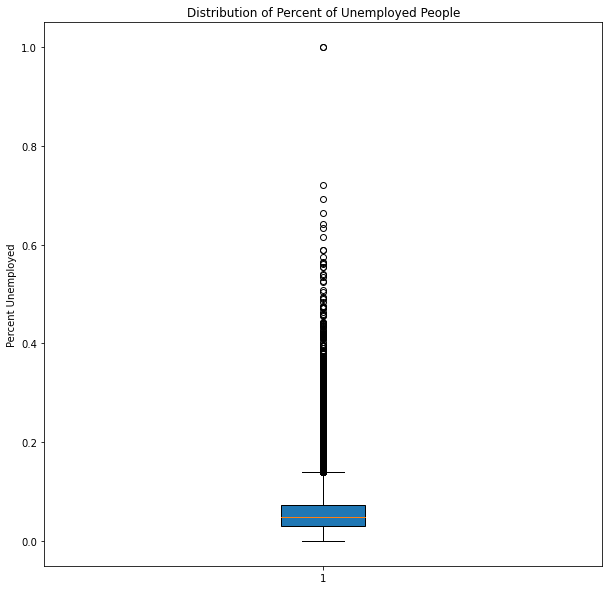

In [88]:
plt.figure(figsize = (10,10))
plt.title('Distribution of Percent of Unemployed People')
plt.ylabel('Percent Unemployed')
plt.boxplot(env['unemp_pct'], patch_artist=True);

The plot above represents the distribution of the percent of people who are unemployed in the dataset. There are some outliers, ranging up to roughly 1. The median is roughly 0.05. The boxplot, excluding outliers, is under 0.20. The distribution ranges from roughly 0 to 1.

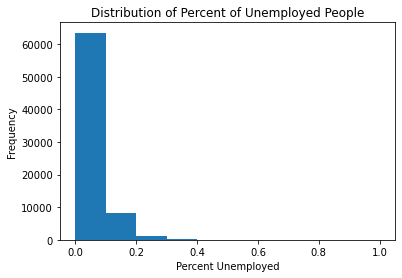

In [89]:
plt.title('Distribution of Percent of Unemployed People')
plt.xlabel('Percent Unemployed')
plt.ylabel('Frequency')
plt.hist(env['unemp_pct']);

The plot above also helps visualize the distribution of the percent of people who are unemployed. The data has a right skew due to the outliers in the upper bounds. The maximum value is roughly 1.  

---

## Examining Diesel Air Levels and Traffic Proximity for Different POC and Low Income Percentages

So far we have examined distributions within a single column or the distribution of a column relative to a given region. To dig a little deeper, we will explore how the people of color percentage column relates to diesel levels and proximity to dense traffic. To understand the magnitude of our findings, we will also look at the diesel levels and proximity to dense traffic for the low income percentage column and see how our measurements differ across the two demographic features.

First we will separate out the respiratory and proximity columns.

In [90]:
resp_cols = ['cancer', 'diesel_pm', 'resp_index', 'pm_25', 'ozone']
prox_cols = ['traffic_prox', 'waste_prox', 'npl_prox', 'rmp_prox']

Let us split up people of color percentage data into increments of 20%. That is, we will assign a label of 1 to Census tracts with percentages between 0 and 20, a label of 2 for tracts between 20 and 40, and so on until tracts with percentages between 80 and 100 are labeled with a 5. This will allow us to see how varying the people of color population influences different pollution metrics.

In [91]:
# assigns 0-20% poc a label of 1, 20-40% a label of 2, etc
env['poc_group'] = env['poc_pct'].apply(pct_split)

# computes pollution column means across these different poc groupings
poc_resp_means = env.groupby('poc_group').mean()[resp_cols]
poc_prox_means = env.groupby('poc_group').mean()[prox_cols]

Immediately, we can see differences in pollution means across these different groupings. Notice that the values within any column increases as we look at larger people of color percentages. The most dramatic increases occur between `poc_group` 1 and 2 in `cancer`, `diesel_pm`, and `resp_index`. It is worth noting that the increase in people of color percentage from 0-20% to 20-40% is the largest relative increase between any two consecutive groups. If there is a relationship between people of color percentage and these pollution metrics, it makes sense the largest difference would occur between group 1 and group 2.

In [92]:
poc_resp_means

,cancer,diesel_pm,resp_index,pm_25,ozone
poc_group,,,,,
1,25.093751,0.193579,0.306947,7.988716,41.946221
2,29.280675,0.300142,0.374811,8.597425,42.578406
3,30.397187,0.342697,0.392105,8.939670,42.998077
4,31.011744,0.383646,0.401299,9.334360,43.664849
5,31.859262,0.442437,0.403499,9.757815,43.293470


For comparison, let us also look at our data after similarly separating across low income percentage. 

In [93]:
env['inc_group'] = env['low_inc_pct'].apply(pct_split)
inc_resp_means = env.groupby('inc_group').mean()[resp_cols]
inc_prox_means = env.groupby('inc_group').mean()[prox_cols]

Below, the relationship between the percentage of low income residents in a Census tract and the different pollution metrics is less explicit. Let us create a few visualizations to see if any relationships become more apparent.

In [94]:
inc_resp_means

,cancer,diesel_pm,resp_index,pm_25,ozone
inc_group,,,,,
1,28.071031,0.304479,0.353813,8.691554,42.825587
2,27.764258,0.275263,0.349526,8.498936,42.469083
3,29.595533,0.309998,0.378406,8.761450,42.457397
4,30.706491,0.364154,0.384998,9.137842,43.123120
5,27.263682,0.271700,0.324179,9.026022,42.977418


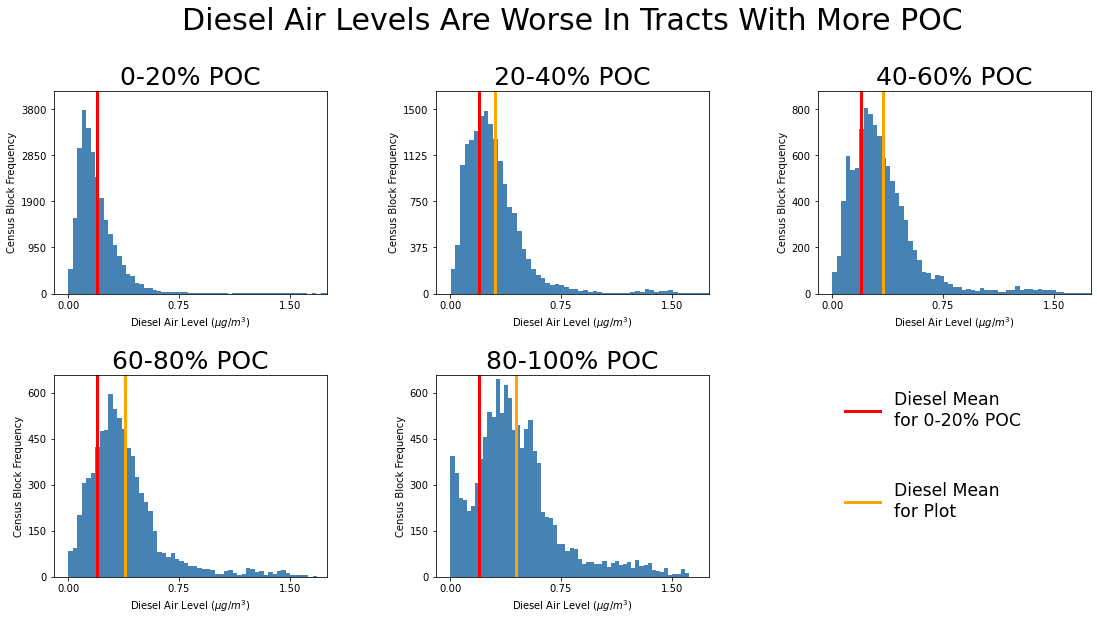

In [95]:
plt.figure(figsize = (18,9))
plt.suptitle('Diesel Air Levels Are Worse In Tracts With More POC', size = 30,)
for i in range(1,6):
    # iterate over the different poc groups
    poc_group = env.loc[env['poc_group'] == i]
    
    # plot histogram
    plt.subplot(2,3,i)
    plt.hist(poc_group['diesel_pm'], bins = 60, color = 'steelblue')
    plt.xlim([-0.1,1.75])
    plt.xticks([0, 0.75, 1.5])
    
    # adjust y-axis to only have 4 values (less clutter)
    # use value counts to obtain largest bar size for y-axis scale
    largest_bin_count = poc_group['diesel_pm'].value_counts(bins = 60).iloc[0]
    y_lim = round(largest_bin_count, -2)
    plt.ylim([0, 1.1*y_lim])
    plt.yticks([0, y_lim* (1/4), y_lim * (2/4), y_lim * (3/4), y_lim])

    # determine what percentage range we are plotting (ex: 20-40% when i = 2)
    low_pct = (i-1)*20
    high_pct = i*20
    
    # generate subplot titles and axis labels
    plt.title(f'{low_pct}-{high_pct}% POC', size = 25)
    plt.xlabel('Diesel Air Level ($\mu g/m^3$)', size = 10)
    plt.ylabel('Census Block Frequency', size = 10)
    
    # create vertical lines representing means
    # in first chart (i = 1) only create its own mean
    # other charts also include the first mean (0-20% group) for comparison
    if i == 1:
        plt.axvline(poc_resp_means['diesel_pm'][1], color = 'red', label = 'Mean for 0-20% POC', linewidth = 3)
    else:
        plt.axvline(poc_resp_means['diesel_pm'][1], color = 'red', label = 'Diesel Mean\nfor 0-20% POC', linewidth = 3)
        plt.axvline(poc_resp_means['diesel_pm'][i], color = 'orange', label = "Diesel Mean\nfor Plot", linewidth = 3)

# place legend outside of the grid
plt.legend(fontsize = 'xx-large',
           bbox_to_anchor = (2.2, 0.6),
           loc='center right',
           frameon = False,
           labelspacing = 3)
        
# create proper spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('../images/diesel_poc.png')

We can clearly see the volume of the histogram shift further right as we look at tracts with more people of color. Moreover, the right side of the histograms consistently increase in size with each plot. And as we saw from our DataFrame, the mean diesel values increase significantly with each group.

When we look at the histograms relating percentage of low income residents to diesel levels, we do not see as strong of a pattern.

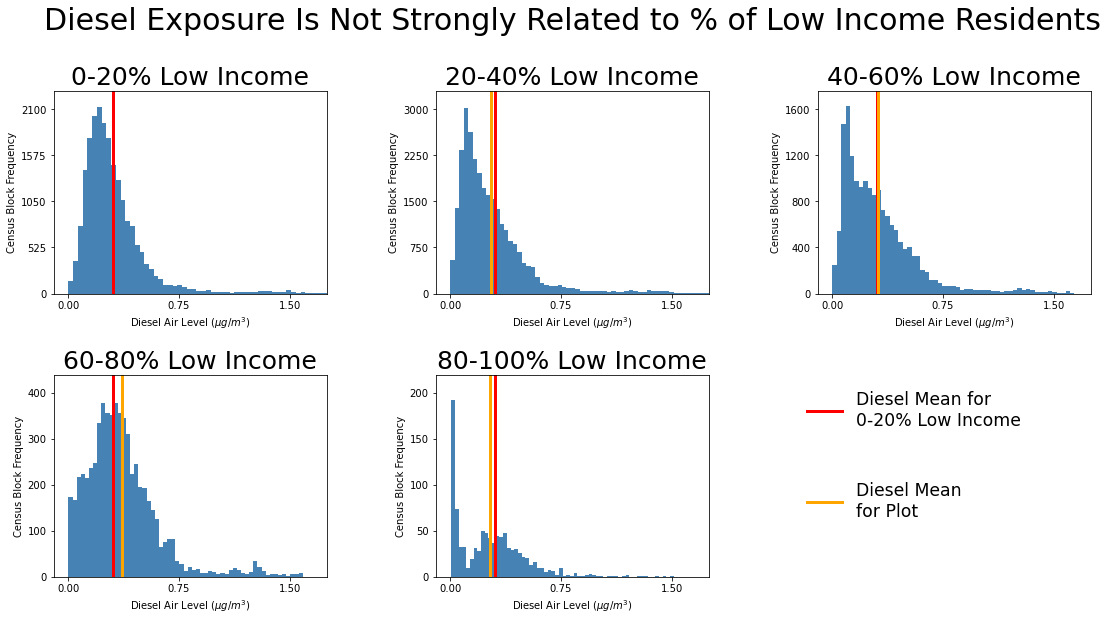

In [96]:
plt.figure(figsize = (18,9))
plt.suptitle('Diesel Exposure Is Not Strongly Related to % of Low Income Residents', size = 30,)
for i in range(1,6):
    # iterate of different low income groups
    inc_group = env.loc[env['inc_group'] == i]
    
    # plot histograms
    plt.subplot(2,3,i)
    plt.hist(inc_group['diesel_pm'], bins = 60, color = 'steelblue')
    plt.xlim([-0.1,1.75])
    plt.xticks([0, 0.75, 1.5])
    
    # adjust y-axis to only have 4 values (less clutter)
    # use value counts to obtain largest bar size for y-axis scale
    largest_bin_count = inc_group['diesel_pm'].value_counts(bins = 60).iloc[0]
    y_lim = round(largest_bin_count, -2)
    plt.ylim([0, 1.1*y_lim])
    plt.yticks([0, y_lim* (1/4), y_lim * (2/4), y_lim * (3/4), y_lim])

    # determine what percentage range we are plotting (ex: 20-40% when i = 2)
    low_pct = (i-1)*20
    high_pct = i*20
    
    # generate subplot titles and axis labels
    plt.title(f'{low_pct}-{high_pct}% Low Income', size = 25)
    plt.xlabel('Diesel Air Level ($\mu g/m^3$)', size = 10)
    plt.ylabel('Census Block Frequency', size = 10)
    
    # create vertical lines representing means
    # in first chart (i = 1) only create its own mean
    # other charts also include the first mean (0-20% group) for comparison
    if i == 1:
        plt.axvline(inc_resp_means['diesel_pm'][1], color = 'red', label = 'Mean for 0-20% Low Income', linewidth = 3)
    else:
        plt.axvline(inc_resp_means['diesel_pm'][1], color = 'red', label = 'Diesel Mean for\n0-20% Low Income', linewidth = 3)
        plt.axvline(inc_resp_means['diesel_pm'][i], color = 'orange', label = "Diesel Mean\nfor Plot", linewidth = 3)

# place legend outside of grid
plt.legend(fontsize = 'xx-large',
           bbox_to_anchor = (2.2, 0.6),
           loc='center right',
           frameon = False,
           labelspacing = 3)

# create proper spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('../images/diesel_low_inc.png')

Another concrete pollution metric is traffic proximity. The values in the traffic proximity column are measure how close people in a tract are to dense traffic. More specically, these values are vehicle counts divided by distances at major roads. This means the largest values within this column represent to high traffic volume close to the people within the tract.

If we look at the distribution of traffic proximity values, we see a similar story to what was shown above. Tracts with more people of color have higher nearby traffic volume.

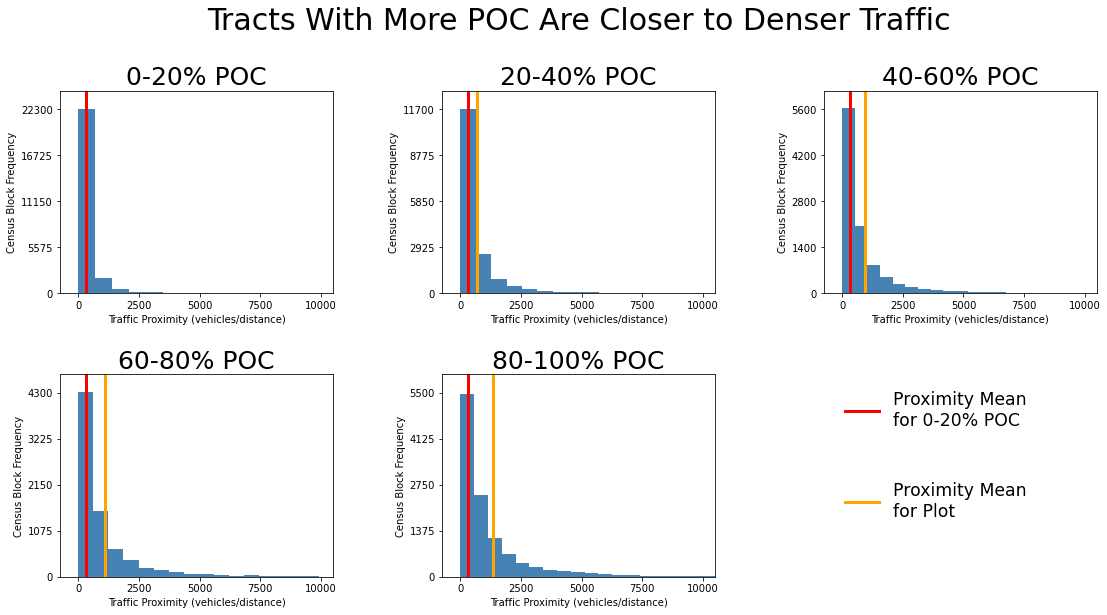

In [97]:
plt.figure(figsize = (18,9))
plt.suptitle('Tracts With More POC Are Closer to Denser Traffic', size = 30,)
for i in range(1,6):
    # iterate over different poc groups
    poc_group = env.loc[env['poc_group'] == i]
    
    # plot histograms
    plt.subplot(2,3,i)
    plt.hist(poc_group['traffic_prox'], bins = 60, color = 'steelblue')
    plt.xlim([-750,10_000 + 500])
    plt.xticks([0, 2500, 5000, 7500, 10_000])
    
    # adjust y-axis to only have 4 values (less clutter)
    # use value counts to obtain largest bar size for y-axis scale
    largest_bin_count = poc_group['traffic_prox'].value_counts(bins = 60).iloc[0]
    y_lim = round(largest_bin_count, -2)
    plt.ylim([0, 1.1*y_lim])
    plt.yticks([0, y_lim* (1/4), y_lim * (2/4), y_lim * (3/4), y_lim])

    # determine what percentage range we are plotting (ex: 20-40% when i = 2)
    low_pct = (i-1)*20
    high_pct = i*20
    
    # generate subplot titles and axis labels
    plt.title(f'{low_pct}-{high_pct}% POC', size = 25)
    plt.xlabel('Traffic Proximity (vehicles/distance)', size = 10)
    plt.ylabel('Census Block Frequency', size = 10)
    
    # create vertical lines representing means
    # in first chart (i = 1) only create its own mean
    # other charts also include the first mean (0-20% group) for comparison
    if i == 1:
        plt.axvline(poc_prox_means['traffic_prox'][1], color = 'red', label = 'Mean for 0-20% POC', linewidth = 3)
    else:
        plt.axvline(poc_prox_means['traffic_prox'][1], color = 'red', label = 'Proximity Mean\nfor 0-20% POC', linewidth = 3)
        plt.axvline(poc_prox_means['traffic_prox'][i], color = 'orange', label = "Proximity Mean\nfor Plot", linewidth = 3)

# place legend outside of grid
plt.legend(fontsize = 'xx-large',
          bbox_to_anchor = (2.2, 0.6),
          loc='center right',
          frameon = False,
          labelspacing = 3)

# create proper spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('../images/traffic_prox_poc.png')

When we examine the relationship between percentage of low income residents and traffic proximity below, we see a much weaker relationship.

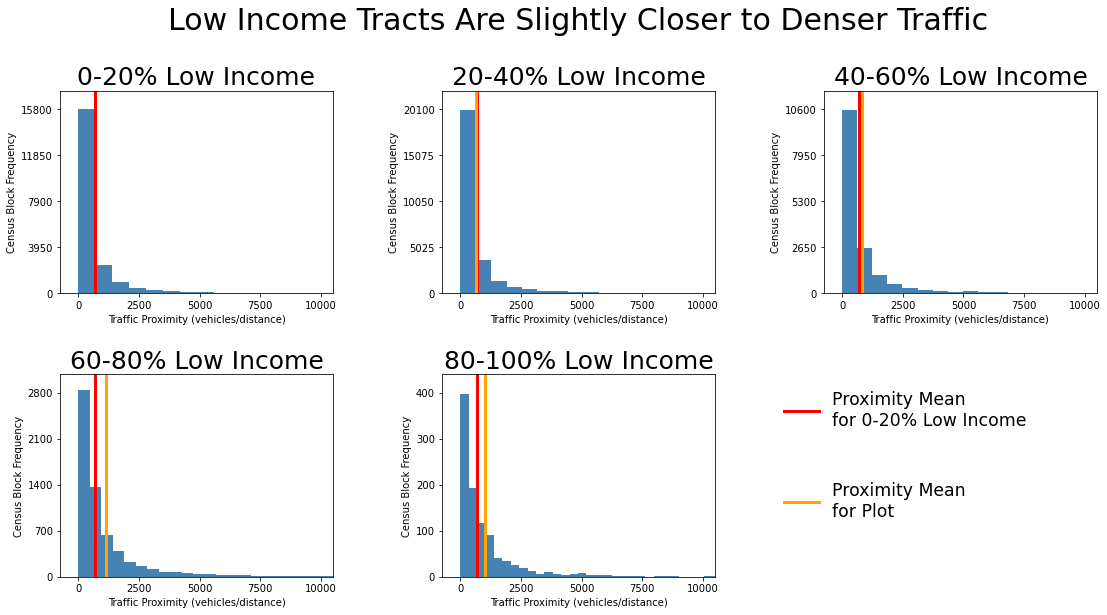

In [98]:
plt.figure(figsize = (18,9))
plt.suptitle('Low Income Tracts Are Slightly Closer to Denser Traffic', size = 30,)
for i in range(1,6):
    # iterate over different low income groups
    inc_group = env.loc[env['inc_group'] == i]
    
    # plot histogram
    plt.subplot(2,3,i)
    plt.hist(inc_group['traffic_prox'], bins = 60, color = 'steelblue')
    plt.xlim([-750,10_000 + 500])
    plt.xticks([0, 2500, 5000, 7500, 10_000])
    
    # adjust y-axis to only have 4 values (less clutter)
    # use value counts to obtain largest bar size for y-axis scale
    largest_bin_count = inc_group['traffic_prox'].value_counts(bins = 60).iloc[0]
    y_lim = round(largest_bin_count, -2)
    plt.ylim([0, 1.1*y_lim])
    plt.yticks([0, y_lim* (1/4), y_lim * (2/4), y_lim * (3/4), y_lim])

    # determine what percentage range we are plotting (ex: 20-40% when i = 2)
    low_pct = (i-1)*20
    high_pct = i*20
    
    # generate subplot titles and axis labels
    plt.title(f'{low_pct}-{high_pct}% Low Income', size = 25)
    plt.xlabel('Traffic Proximity (vehicles/distance)', size = 10)
    plt.ylabel('Census Block Frequency', size = 10)
    
    # create vertical lines representing means
    # in first chart (i = 1) only create its own mean
    # other charts also include the first mean (0-20% group) for comparison
    if i == 1:
        plt.axvline(inc_prox_means['traffic_prox'][1], color = 'red', label = 'Proximity Mean\nfor 0-20% Low Income', linewidth = 3)
    else:
        plt.axvline(inc_prox_means['traffic_prox'][1], color = 'red', label = 'Proximity Mean\nfor 0-20% Low Income', linewidth = 3)
        plt.axvline(inc_prox_means['traffic_prox'][i], color = 'orange', label = "Proximity Mean\nfor Plot", linewidth = 3)

# place legend outside of grid
plt.legend(fontsize = 'xx-large',
           bbox_to_anchor = (2.2, 0.6),
           loc='center right',
           frameon = False,
           labelspacing = 3)

# create proper spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('../images/traffix_prox_low_inc.png')

The main takeaway from the images above is that diesel air levels have a a stronger relationship to tracts with more people of color than to tracts with more low income residents.

----

## Testing Line Assumptions

In [100]:
train_imputed = pd.read_csv('../data/train_cleaned_imputed.csv', index_col = ['Unnamed: 0'])
val_imputed = pd.read_csv('../data/val_cleaned_imputed.csv', index_col = ['Unnamed: 0'])

In [101]:
all_imputed = pd.concat([train_imputed, val_imputed], ignore_index=True, axis=0)

In [102]:
all_imputed.head()

,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,pop,...,rmp_prox,waste_prox,ozone,pm_25,undgrd_stor,cancer,st_name,st_abbrev,shape_length,shape_area
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,...,0.077960,0.500305,37.010497,9.152519,0.412039,40.0,Alabama,AL,19197.315791,1.387495e+07
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1959.0,...,0.082735,0.818620,37.038957,9.183280,2.461319,40.0,Alabama,AL,11652.054724,4.694106e+06
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10596.0,...,0.090465,1.082545,37.123515,9.242796,2.222632,40.0,Alabama,AL,20306.660651,1.613176e+07
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3668.0,...,0.109214,0.629107,37.053841,9.169609,1.536412,40.0,Alabama,AL,17011.687616,1.140751e+07
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,...,0.214272,0.039555,36.647373,8.861050,0.023569,30.0,Alabama,AL,130557.083811,5.489691e+08


In [103]:
features = all_imputed.drop(columns = ['cancer',  
                                       'st_name', 
                                       'st_abbrev', 
                                       'shape_length', 
                                       'shape_area', 
                                       'region_2',
                                       'region_3',
                                       'region_4',
                                       'region_5',
                                       'region_6',
                                       'region_7',
                                       'region_8',
                                       'region_9',
                                       'region_10', 
                                      ])

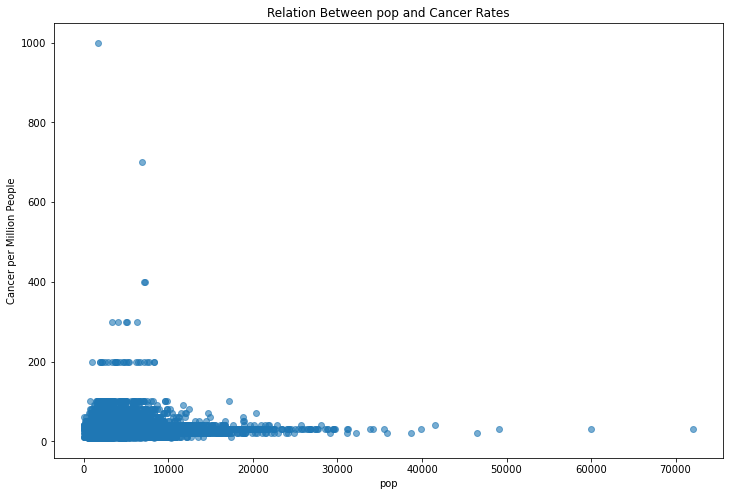

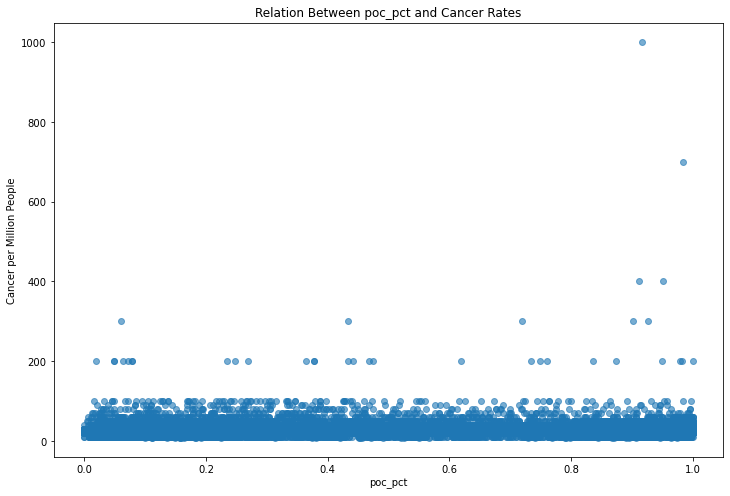

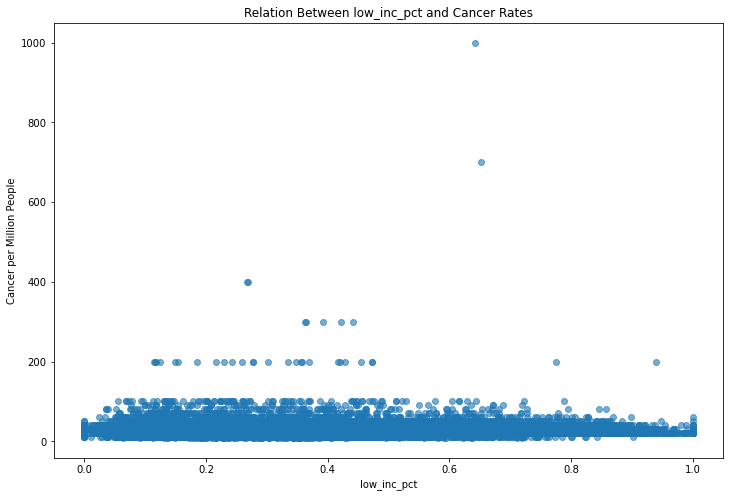

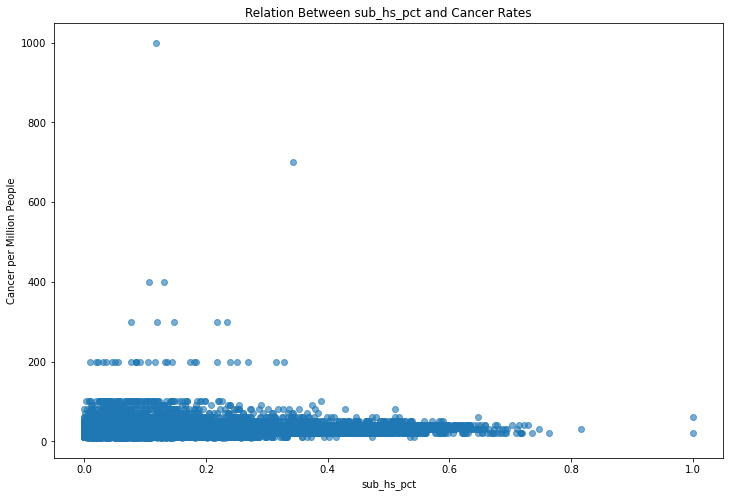

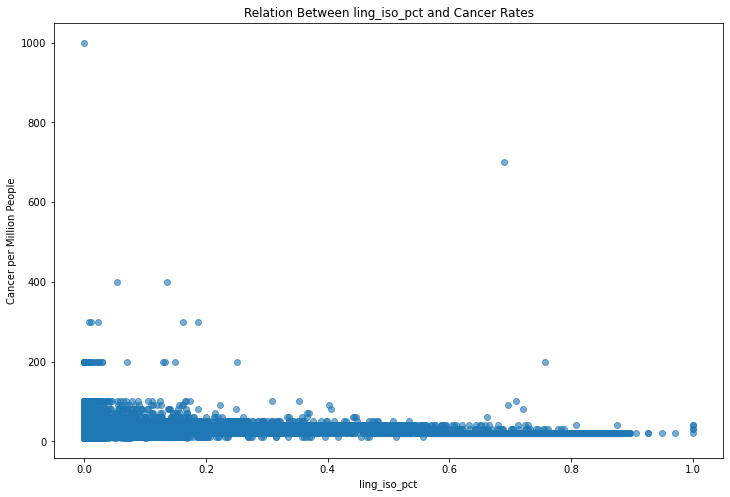

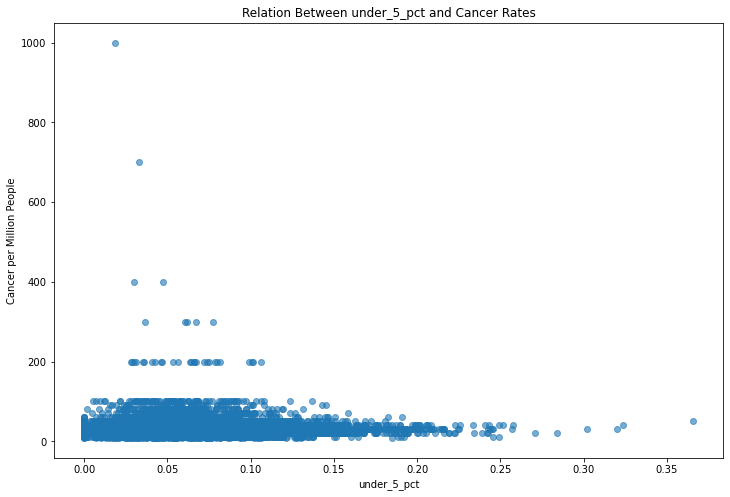

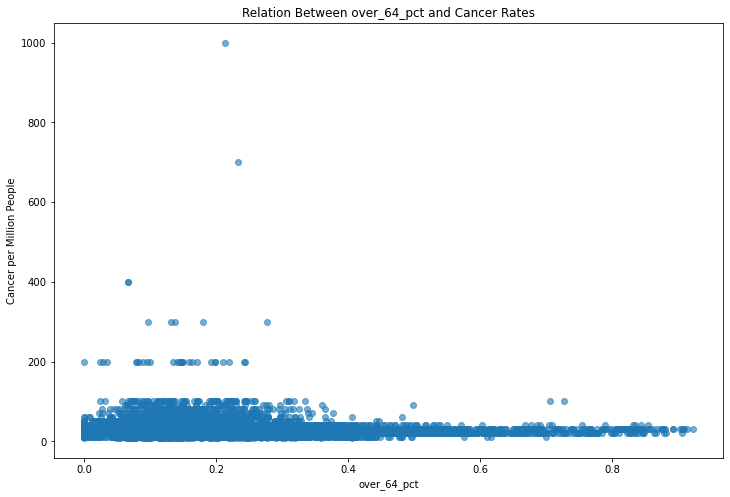

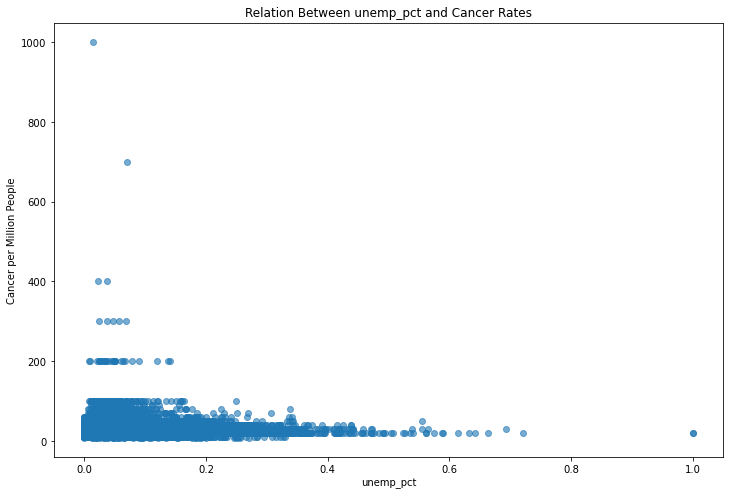

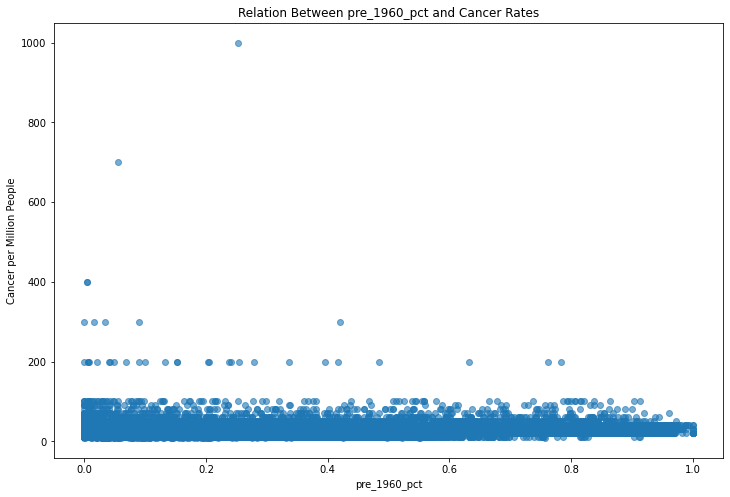

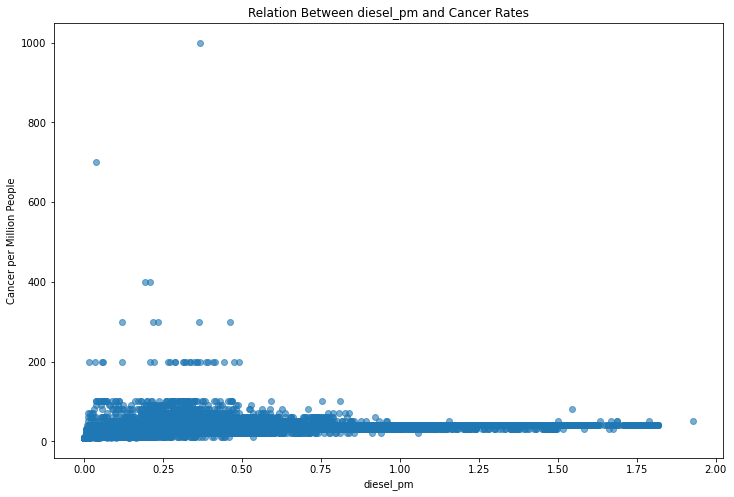

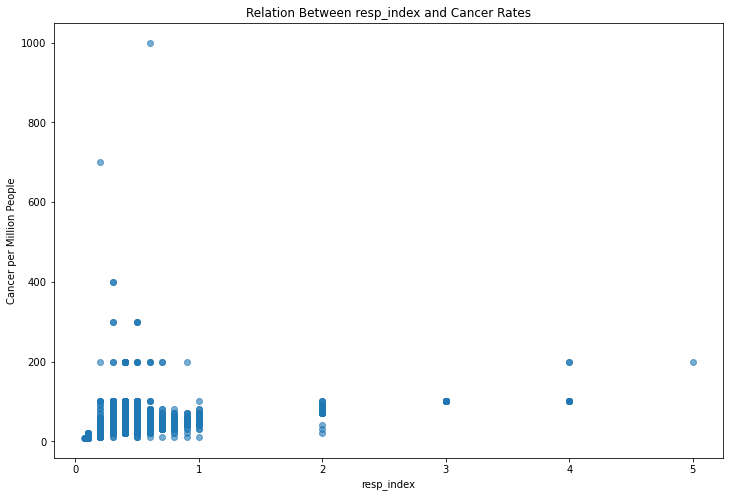

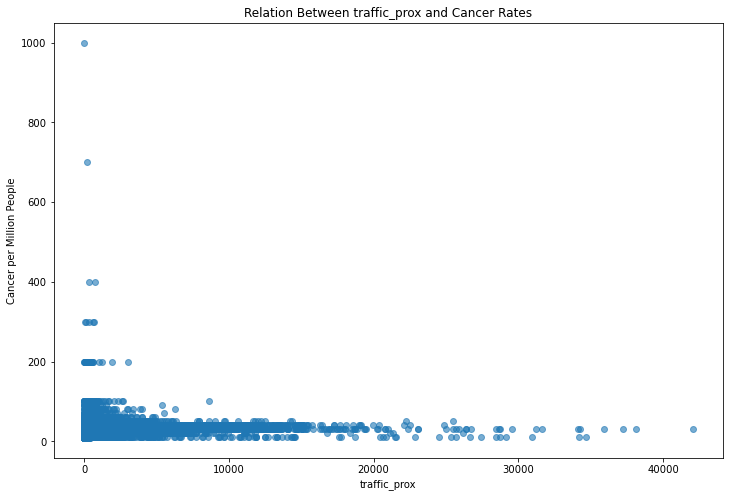

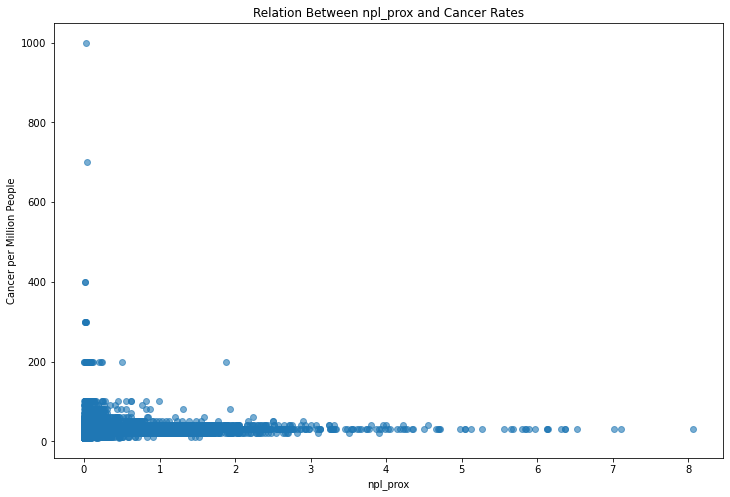

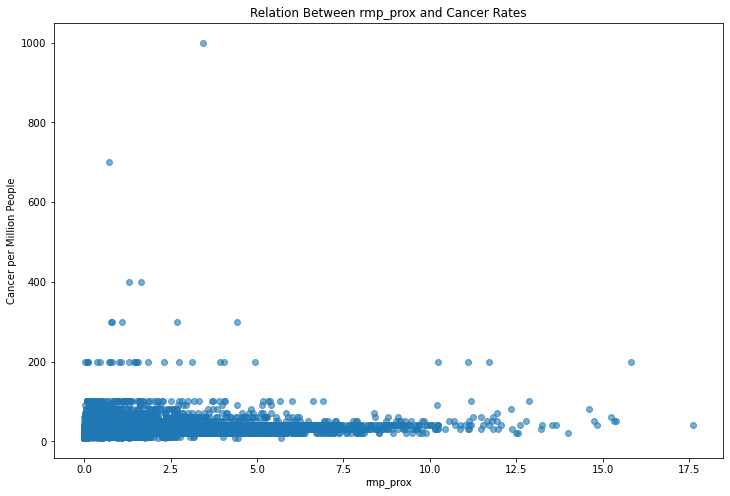

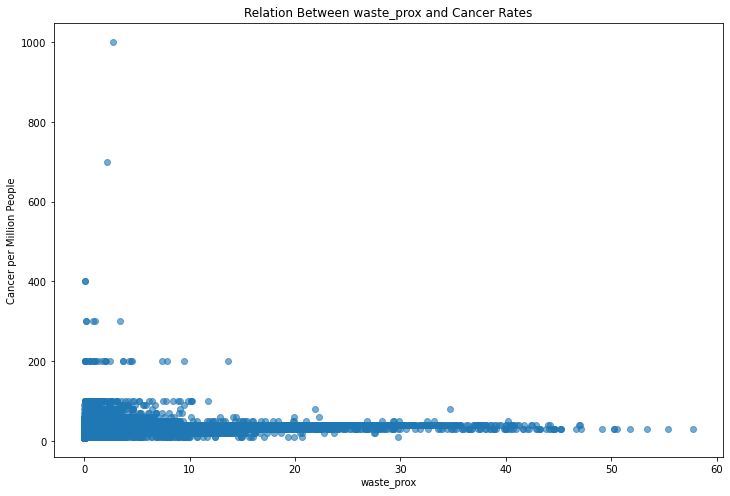

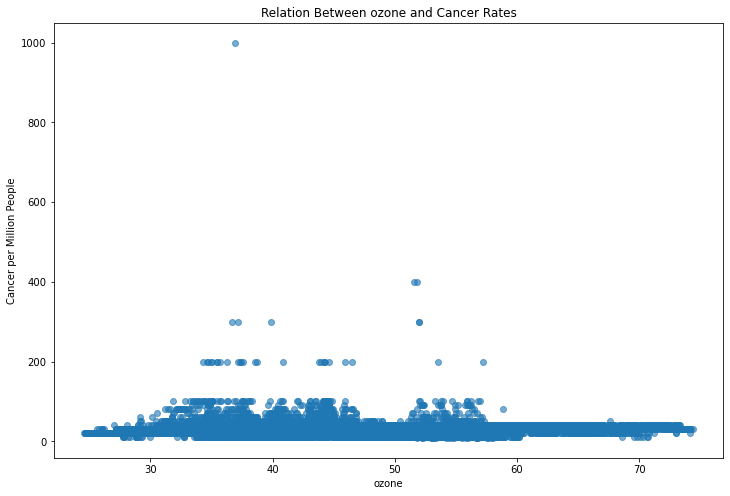

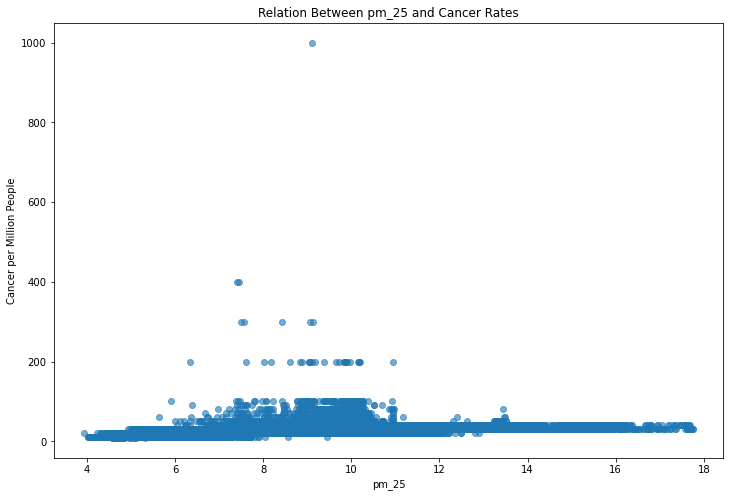

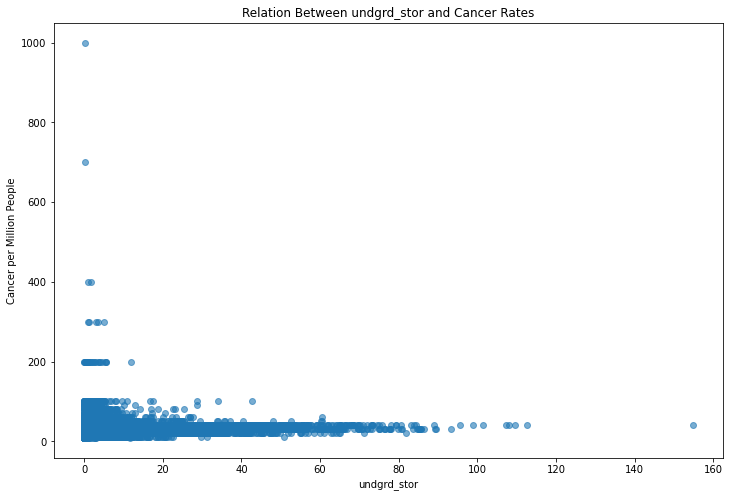

In [104]:
for column in features.columns:
    scatter_plot(column)

None of these scatterplots of our X variables with our target variable of cancer show evidence of a linear relation; the scatter plots do not show any discernable pattern or relation. This fails the assumption of linearity.

#### Independence of Observations (Multicollinearity)

In [105]:
calc_vif(features)

,vif
pm_25,33.513364
ozone,28.157033
resp_index,12.481041
low_inc_pct,10.789563
under_5_pct,7.273332
diesel_pm,7.222390
poc_pct,6.733128
sub_hs_pct,6.265682
over_64_pct,5.431590
pop,5.274813


Eleven of our variables have a VIF of over 10, meaning that there is evidence of multicollinearity with many of our variables, failing the assumption of independence of observations.

#### Normality of Residuals

In [106]:
lr = LinearRegression()

In [107]:
X =all_imputed.drop(columns=['cancer', 'st_name', 'st_abbrev', 'shape_length', 'shape_area'])

In [108]:
y = env['cancer']

In [109]:
lr.fit(X, y)

LinearRegression()

In [110]:
predictions = lr.predict(X)

In [111]:
resids = y - predictions

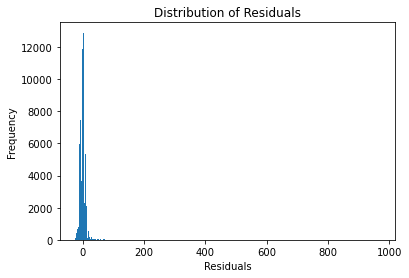

In [112]:
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(resids, bins= 400);

In [113]:
resids.describe()

count    7.313400e+04
mean    -6.809198e-16
std      1.044172e+01
min     -2.402335e+01
25%     -6.010324e+00
50%     -2.946188e-01
75%      3.768628e+00
max      9.686825e+02
Name: cancer, dtype: float64

The distribution of the residuals has a severe right skew, with an outlier residual of 968. Even without this outlier, there is still a right skew. This violates the assumption of normality of residuals.

Equal Variance of Residuals

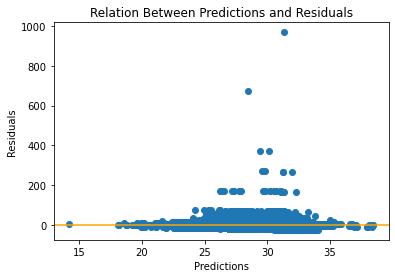

In [114]:
plt.title('Relation Between Predictions and Residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.scatter(predictions, resids)
plt.axhline(0, color = 'orange');

The scatter plot of the residuals shows that there is not equal variance, which violates the line assumption. 

Our data does not meet the line assumptions necessary to use linear regression for inference, so we will only be able to use any linear regression models for prediction. 